# Library

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
from sklearn.decomposition import PCA

# Load Dataset

In [4]:
# load the dataset
url = 'https://raw.githubusercontent.com/tidyverse/ggplot2/master/data-raw/diamonds.csv'
diamonds = pd.read_csv(url)
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


# Exploratory Data Analysis

Pertanyaan untuk proses EDA:

- Apa saja jenis variabel pada dataset?
- Bagaimana distribusi variabel dalam dataset?
- Apakah ada missing value?
- Apakah ada fitur yang tidak berguna (redundant)?
- Bagaimana korelasi antara fitur dan target?

## Deskripsi Variabel

- Harga dalam dolar Amerika Serikat ($) adalah fitur target.
- carat: merepresentasikan bobot (weight) dari diamonds (0.2-5.01), digunakan sebagai ukuran dari batu permata dan perhiasan.
- cut: merepresentasikan kualitas pemotongan diamonds (Fair, Good, Very Good, Premium, and Ideal).
- color: merepresentasikan warna, dari J (paling buruk) ke D (yang terbaik).
- clarity: merepresentasikan seberapa jernih diamonds (I1 (paling buruk), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (terbaik))
- x: merepresentasikan panjang diamonds dalam mm (0-10.74).
- y: merepresentasikan lebar diamonds dalam mm (0-58.9).
- z: merepresentasikan kedalaman diamonds dalam mm (0-31.8).
- depth: merepresentasikan z/mean(x, y) = 2 * z/(x + y) (43-79).
- table: merepresentasikan lebar bagian atas berlian relatif terhadap titik terlebar 43-95).

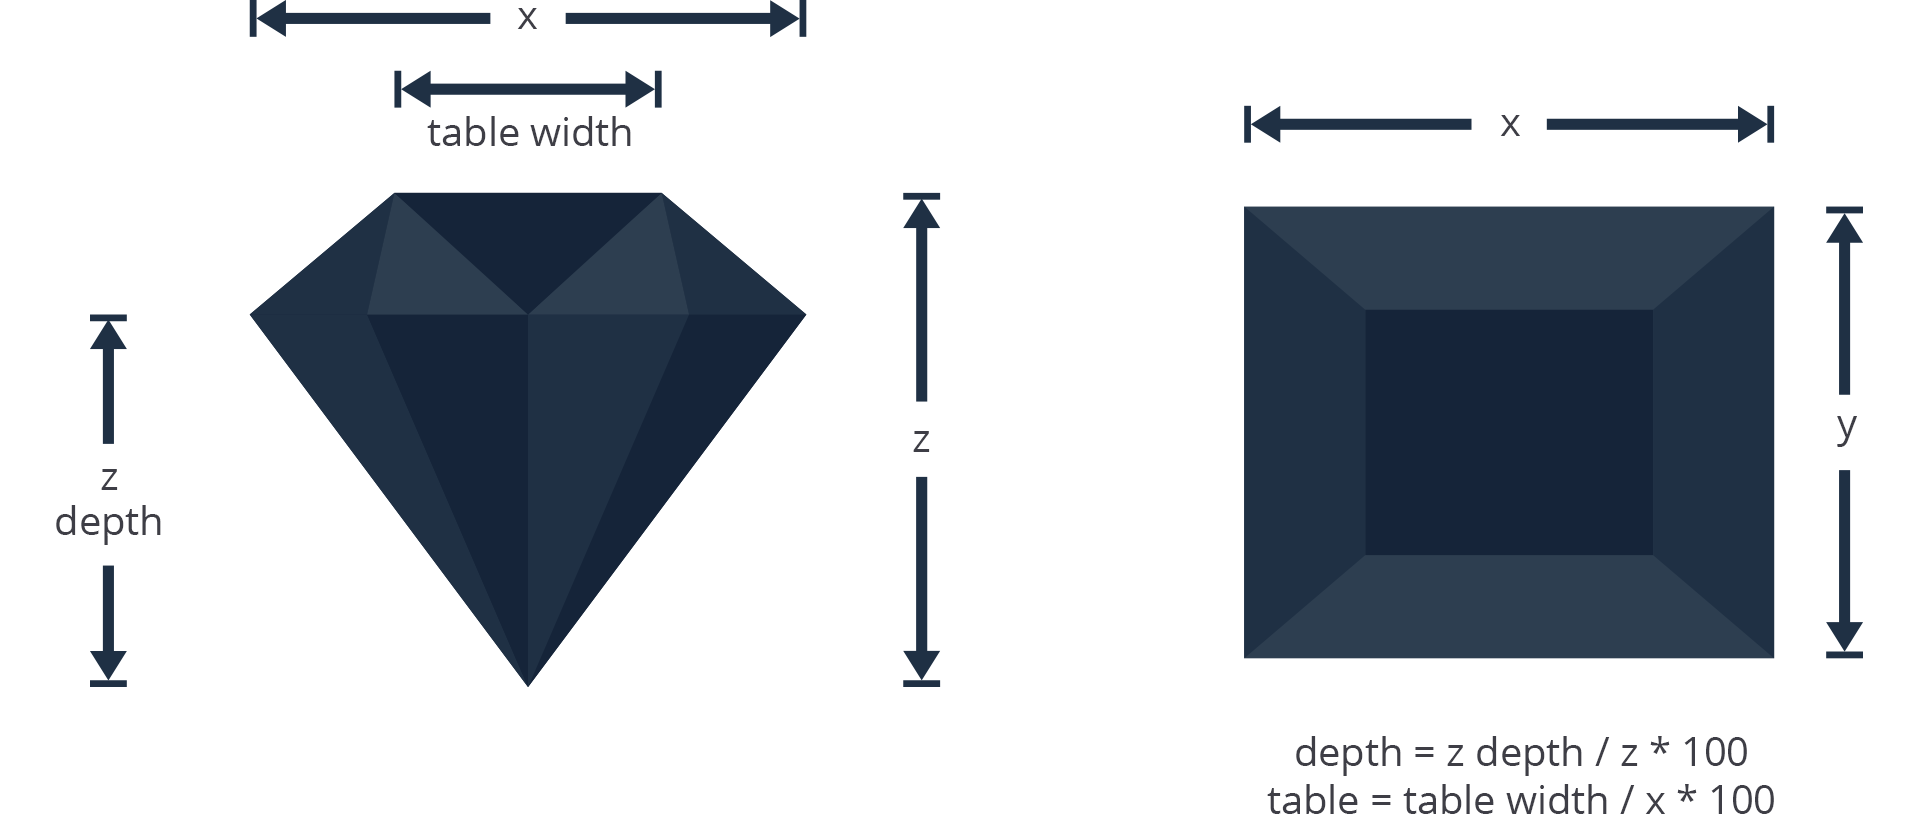

In [5]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


- Terdapat 3 kolom dengan tipe object, yaitu: cut, color, dan clarity. Kolom ini merupakan categorical features (fitur non-numerik).
- Terdapat 6 kolom numerik dengan tipe data float64 yaitu: carat, depth, table, x, y, dan z. Ini merupakan fitur numerik yang merupakan hasil pengukuran secara fisik.
- Terdapat 1 kolom numerik dengan tipe data int64, yaitu: price. Kolom ini merupakan target fitur kita.

In [6]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Fungsi describe() memberikan informasi statistik pada masing-masing kolom, antara lain:

- Count  adalah jumlah sampel pada data.
- Mean adalah nilai rata-rata.
- Std adalah standar deviasi.
- Min yaitu nilai minimum setiap kolom.
- 25% adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
- 50% adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
- 75% adalah kuartil ketiga.
- Max adalah nilai maksimum.

## Menangani Missing Value

Dari hasil fungsi describe(), nilai minimum untuk kolom x, y, dan z adalah 0. Seperti kita tahu, x, y, dan z adalah ukuran panjang, lebar, dan kedalaman diamonds sehingga tidak mungkin ada diamonds dengan dimensi x, y, atau z bernilai 0. Kita patut menduga bahwa ini merupakan data yang tidak valid atau sering disebut missing value. Mari kita cek ada berapa missing value pada kolom x, y, dan z.

In [7]:
x = (diamonds.x == 0).sum()
y = (diamonds.y == 0).sum()
z = (diamonds.z == 0).sum()

print("Nilai 0 di kolom x ada: ", x)
print("Nilai 0 di kolom y ada: ", y)
print("Nilai 0 di kolom z ada: ", z)

Nilai 0 di kolom x ada:  8
Nilai 0 di kolom y ada:  7
Nilai 0 di kolom z ada:  20


Selanjutnya, mari kita cek, apakah data bernilai 0 pada salah satu dimensi juga terdapat pada dimensi lain? Kita cek dari kolom z yang memiliki jumlah missing value terbanyak.

In [8]:
diamonds.loc[(diamonds['z']==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


Ada beberapa teknik untuk mengatasi missing value:
- Menghapus atau melakukan drop terhadap data yang hilang
- Menggantinya dengan mean atau median
- Memprediksi dan mengganti nilainya dengan teknik regresi

In [9]:
# Drop baris dengan nilai 'x', 'y', dan 'z' = 0
diamonds = diamonds.loc[(diamonds[['x','y','z']]!=0).all(axis=1)]

# Cek ukuran data untuk memastikan baris sudah di-drop
diamonds.shape

(53920, 10)

In [10]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Nilai minimum pada kolom x, y, dan z sudah bukan 0 lagi.

## Menangani Outliers

Ada beberapa teknik untuk menangani outliers, antara lain:

- Hypothesis Testing
- Z-score method
- IQR Method

Pada kasus ini, Anda akan mendeteksi outliers dengan teknik visualisasi data (boxplot). Kemudian, Anda akan menangani outliers dengan teknik IQR method.
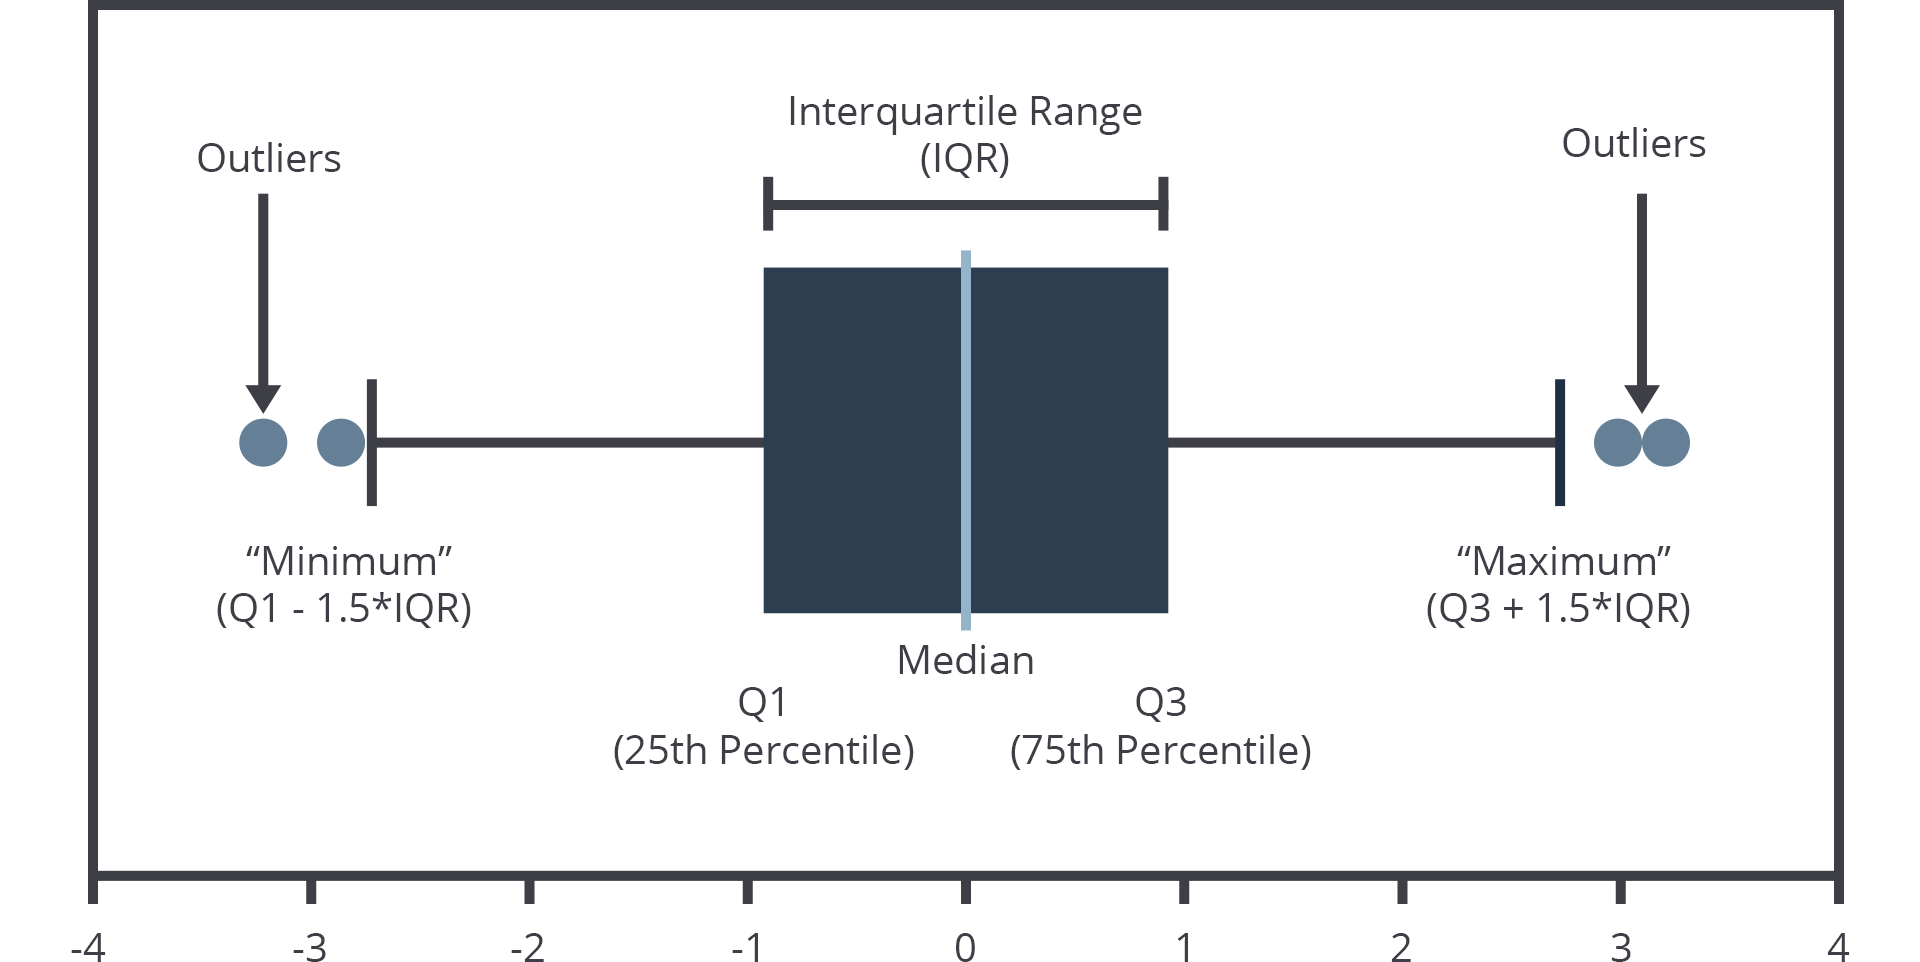

<Axes: xlabel='carat'>

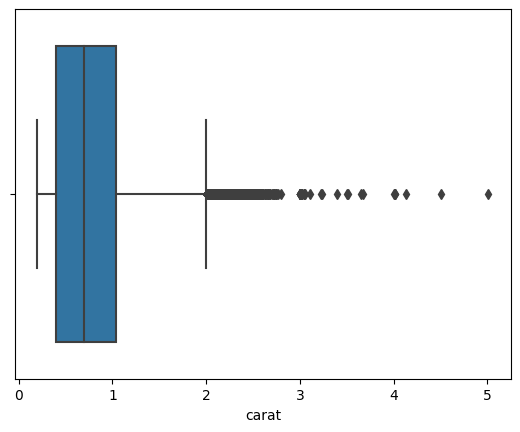

In [11]:
sns.boxplot(x=diamonds['carat'])

<Axes: xlabel='table'>

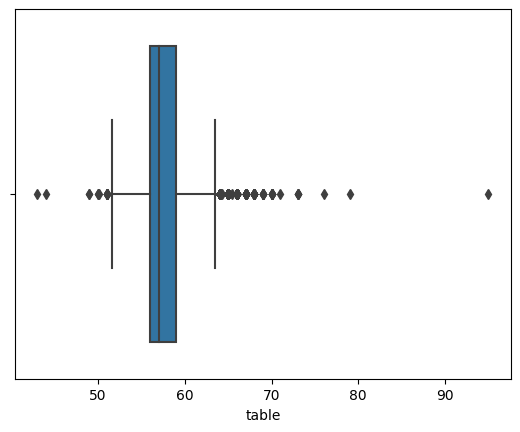

In [12]:
sns.boxplot(x=diamonds['table'])

<Axes: xlabel='x'>

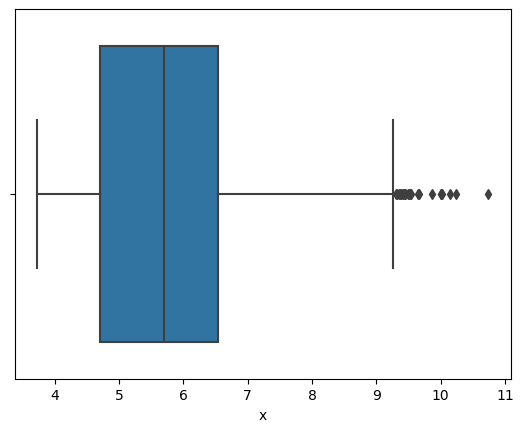

In [13]:
sns.boxplot(x=diamonds['x'])

In [14]:
'''
Batas bawah = Q1 - 1.5 * IQR
Batas atas = Q3 + 1.5 * IQR
'''
Q1 = diamonds.quantile(0.25)
Q3 = diamonds.quantile(0.75)
IQR=Q3-Q1
diamonds=diamonds[~((diamonds<(Q1-1.5*IQR))|(diamonds>(Q3+1.5*IQR))).any(axis=1)]

# Cek ukuran dataset setelah kita drop outliers
diamonds.shape

<ipython-input-14-f7e1bf2eab9d>:5: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = diamonds.quantile(0.25)
<ipython-input-14-f7e1bf2eab9d>:6: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = diamonds.quantile(0.75)
<ipython-input-14-f7e1bf2eab9d>:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  diamonds=diamonds[~((diamonds<(Q1-1.5*IQR))|(diamonds>(Q3+1.5*IQR))).any(axis=1)]


(47524, 10)

## Univariate Analysis

Anda bagi fitur pada dataset menjadi dua bagian, yaitu numerical features dan categorical features.

In [15]:
numerical_features = ['price', 'carat', 'depth', 'table', 'x', 'y', 'z']
categorical_features = ['cut', 'color', 'clarity']

### Categorical Features

#### Fitur Cut

           jumlah sampel  persentase
Ideal              20340        42.8
Premium            12115        25.5
Very Good          10994        23.1
Good                3745         7.9
Fair                 330         0.7


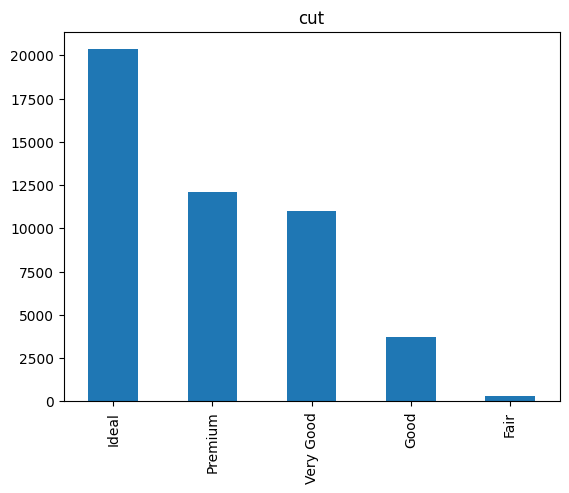

In [16]:
feature = categorical_features[0]
count = diamonds[feature].value_counts()
percent = 100*diamonds[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Terdapat 5 kategori pada fitur Cut, secara berurutan dari jumlahnya yang paling banyak yaitu: Ideal, Premium, Very Good, Good, dan Fair. Dari data persentase dapat kita simpulkan bahwa lebih dari 60% sampel merupakan diamonds tipe grade tinggi, yaitu grade Ideal dan Premium.

#### Fitur Color

   jumlah sampel  persentase
G          10081        21.2
E           8910        18.7
F           8466        17.8
H           7176        15.1
D           6195        13.0
I           4462         9.4
J           2234         4.7


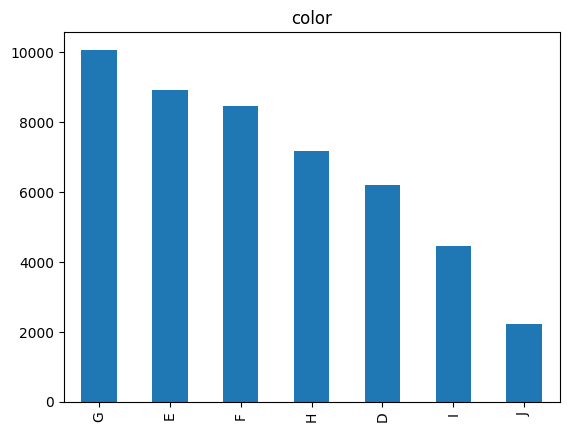

In [17]:
feature = categorical_features[1]
count = diamonds[feature].value_counts()
percent = 100*diamonds[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Berdasarkan deskripsi variabel, urutan kategori warna dari yang paling buruk ke yang paling bagus adalah J, I, H, G, F, E, dan D. Dari grafik di atas, dapat kita simpulkan bahwa sebagian besar grade berada pada grade menengah, yaitu G, F, H.

#### Fitur Clarity

      jumlah sampel  persentase
SI1           11552        24.3
VS2           10928        23.0
SI2            7402        15.6
VS1            7373        15.5
VVS2           4683         9.9
VVS1           3463         7.3
IF             1650         3.5
I1              473         1.0


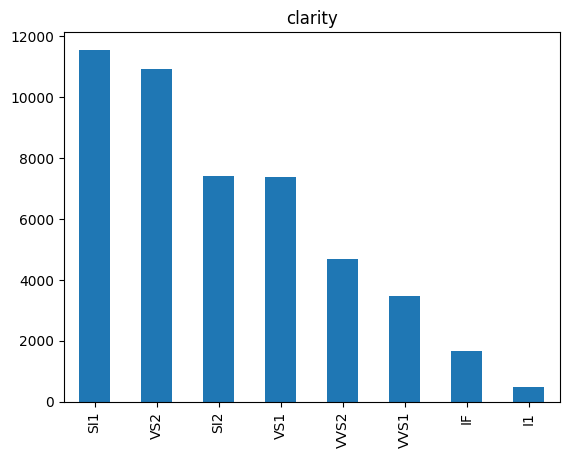

In [18]:
feature = categorical_features[2]
count = diamonds[feature].value_counts()
percent = 100*diamonds[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Berdasarkan informasi dari deskripsi variabel, fitur Clarity terdiri dari 8 kategori dari yang paling buruk ke yang paling baik, yaitu: I1, SI2, SI1, VS2, VS1, VVS2, VVS1, dan IF.

- 'IF' - Internally Flawless
- 'VVS2' - Very Very Slight Inclusions
- 'VVS1' - Very Very Slight Inclusions
- 'VS1' - Very Slight Inclusions
- 'VS2' - Very Slight Inclusions
- 'SI2' - Slight Inclusions
- 'SI1' - Slight Inclusions
- 'I1' - Imperfect
Dari grafik kita bisa menyimpulkan bahwa sebagian besar fitur merupakan grade rendah, yaitu SI1, SI2, dan VS2.



### Numerical Features

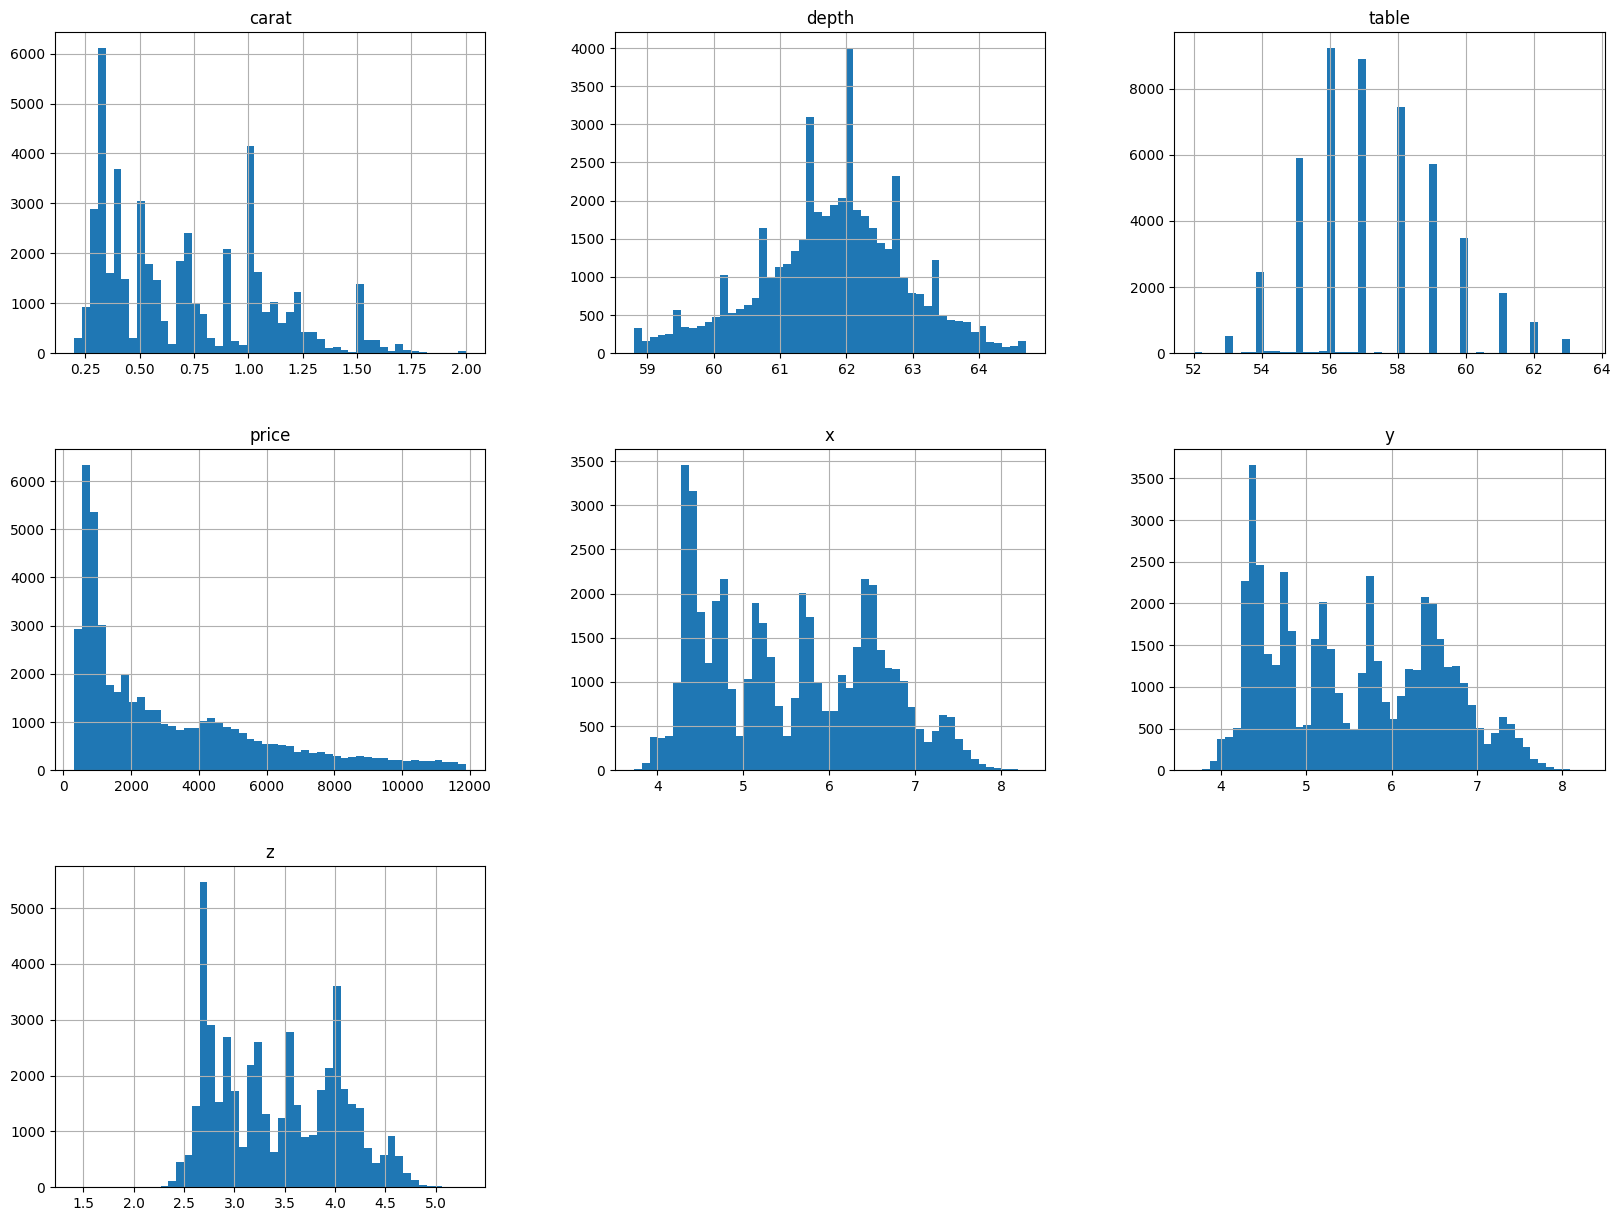

In [19]:
diamonds.hist(bins=50, figsize=(20,15))
plt.show()

Mari amati histogram di atas, khususnya histogram untuk variabel "price" yang merupakan fitur target (label) pada data kita. Dari histogram "price", kita bisa memperoleh beberapa informasi, antara lain:

- Peningkatan harga diamonds sebanding dengan penurunan jumlah sampel. Hal ini dapat kita lihat jelas dari histogram "price" yang grafiknya mengalami penurunan seiring dengan semakin banyaknya jumlah sampel (sumbu x).
- Rentang harga diamonds cukup tinggi yaitu dari skala ratusan dolar Amerika hingga sekitar $11800.

- Setengah harga berlian bernilai di bawah $2500.
- Distribusi harga miring ke kanan (right-skewed). Hal ini akan berimplikasi pada model.

## Multivariate Analysis

### Categorical Features

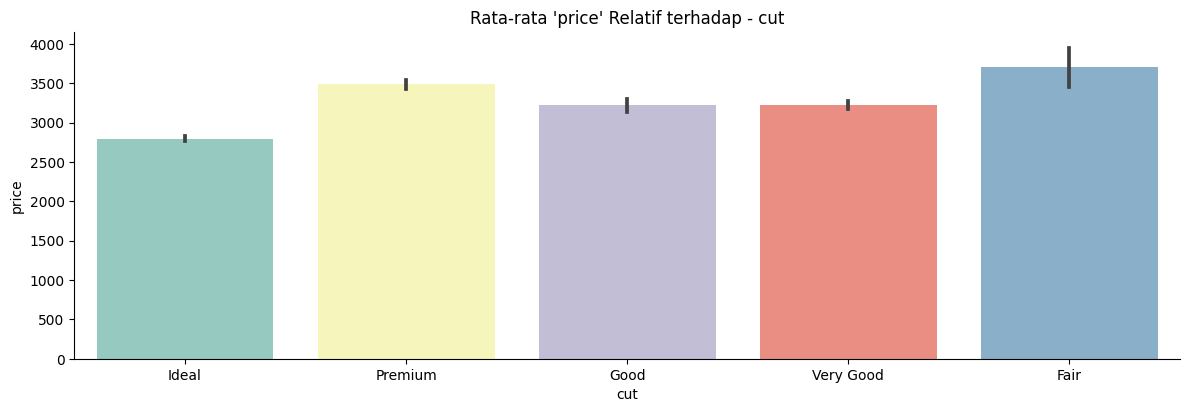

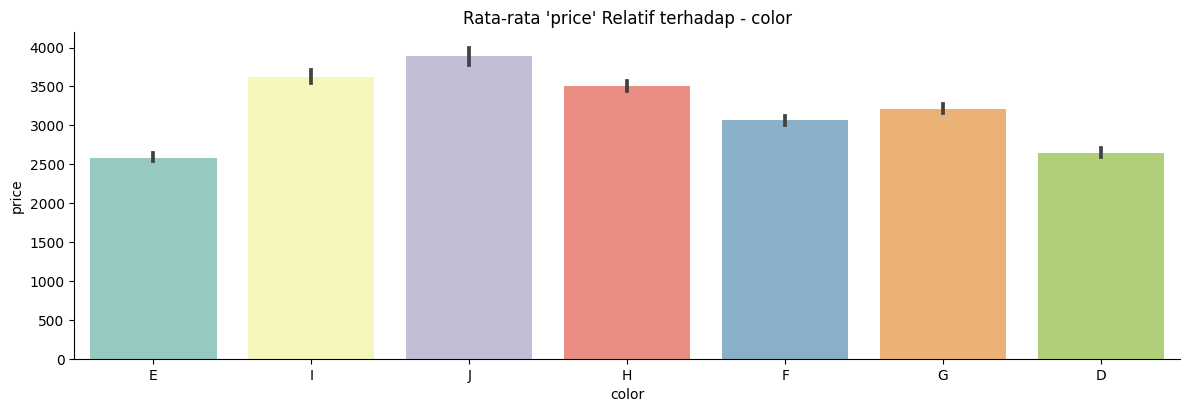

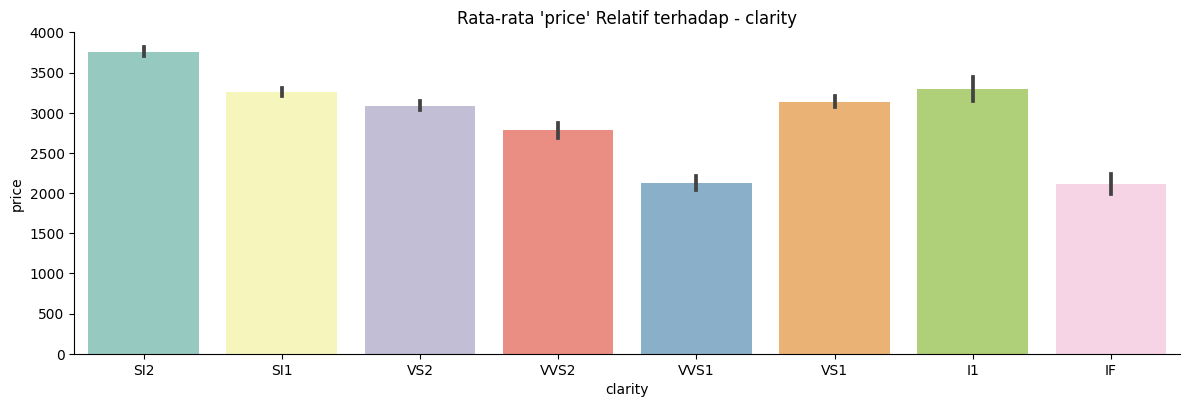

In [20]:
cat_features = diamonds.select_dtypes(include='object').columns.to_list()

for col in cat_features:
  sns.catplot(x=col, y="price", kind="bar", dodge=False, height = 4, aspect = 3,  data=diamonds, palette="Set3")
  plt.title("Rata-rata 'price' Relatif terhadap - {}".format(col))

Dengan mengamati rata-rata harga relatif terhadap fitur kategori di atas, kita memperoleh insight sebagai berikut:

- Pada fitur ‘cut’, rata-rata harga cenderung mirip. Rentangnya berada antara 3500 hingga 4500. Grade tertinggi yaitu grade Ideal memiliki harga rata-rata terendah diantara grade lainnya. Sehingga, fitur cut memiliki pengaruh atau dampak yang kecil terhadap rata-rata harga.
- Pada fitur ‘color’, semakin rendah grade warna, harga diamonds justru semakin tinggi. Dari sini dapat disimpulkan bahwa warna memiliki pengaruh yang rendah terhadap harga.
- Pada fitur ‘clarity’, secara umum, diamond dengan grade lebih rendah memiliki harga yang lebih tinggi. Hal ini berarti bahwa fitur ‘clarity’ memiliki pengaruh yang rendah terhadap harga.
Kesimpulan akhir, fitur kategori memiliki pengaruh yang rendah terhadap harga.

### Numerical Features

In [21]:
# # Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
# sns.pairplot(diamonds, diag_kind = 'kde')

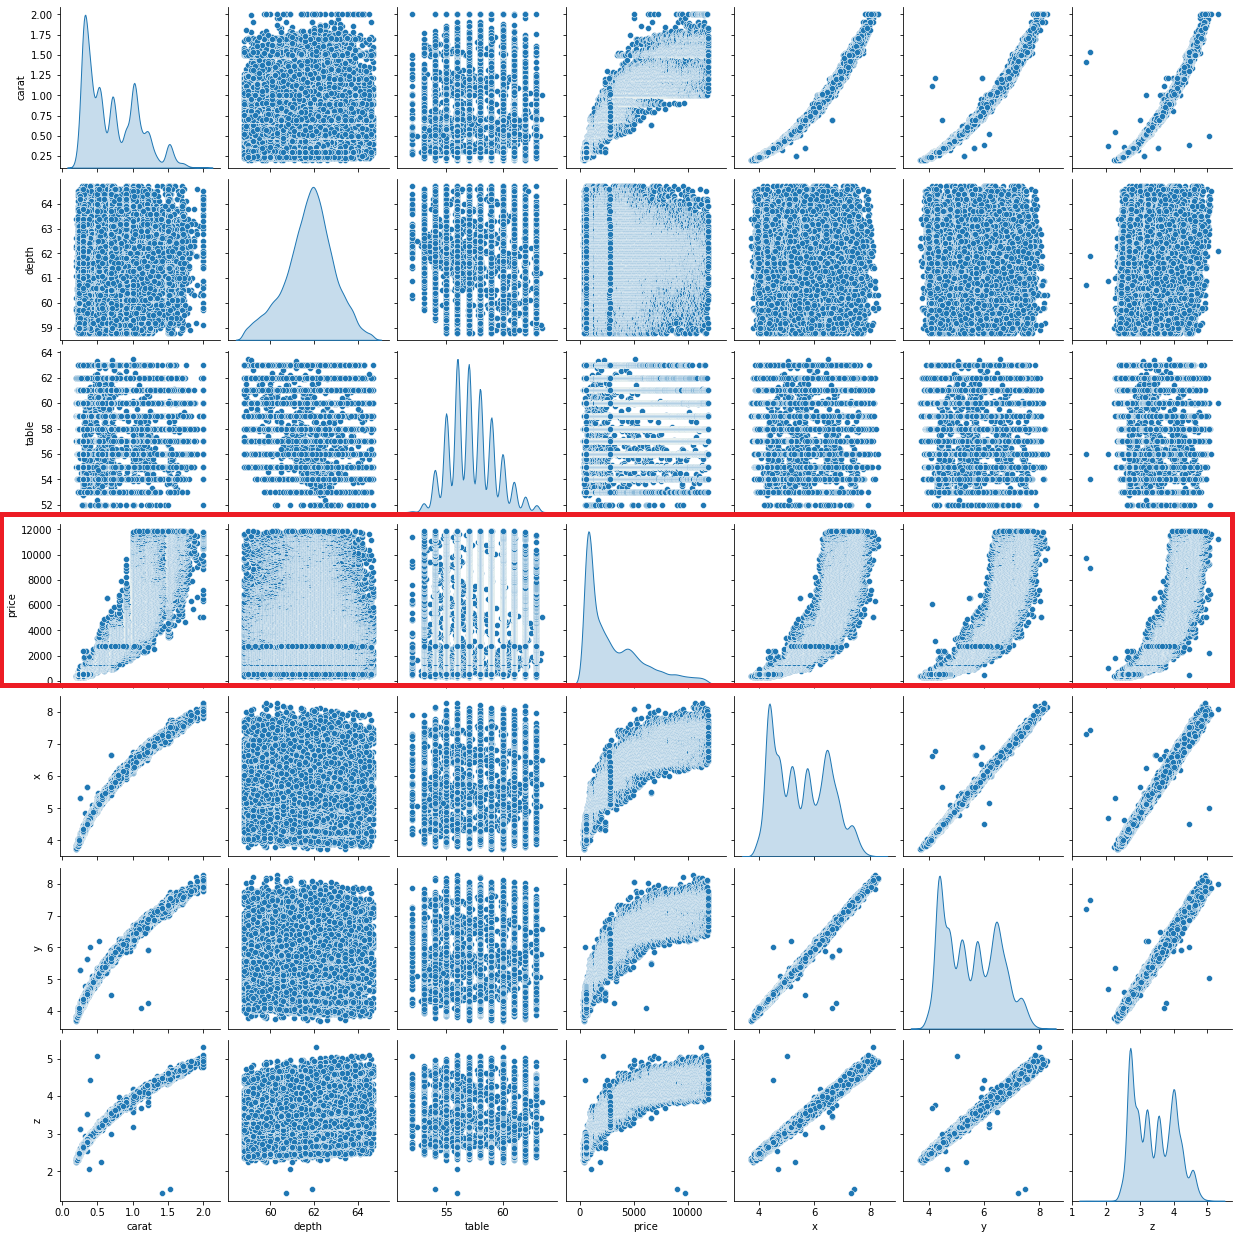

Pada kasus ini, kita akan melihat relasi antara semua fitur numerik dengan fitur target kita yaitu ‘price’. Untuk membacanya, perhatikan fitur pada sumbu y, temukan fitur target ‘price’, dan lihatlah grafik relasi antara semua fitur pada sumbu x dengan fitur price pada sumbu y. Dalam hal ini, fitur ‘price’ berada pada baris keempat (dari atas) sumbu y (ditandai oleh kotak merah). Sehingga, kita cukup melihat relasi antar fitur numerik dengan fitur target ‘price’ pada baris tersebut saja.

Sebelum memperhatikan pola sebaran data pada grafik pairplot di atas, mari kita pahami terlebih dahulu cara membaca korelasi pada sebaran data. Korelasi pada fitur tampak dari adanya pola pada sebaran data. Sebaran data acak merupakan indikasi korelasi yang lemah (atau tidak ada korelasi sama sekali). Sedangkan, sebaran yang memiliki pola (tidak acak) merupakan indikasi adanya korelasi. Perhatikan contoh gambar berikut.

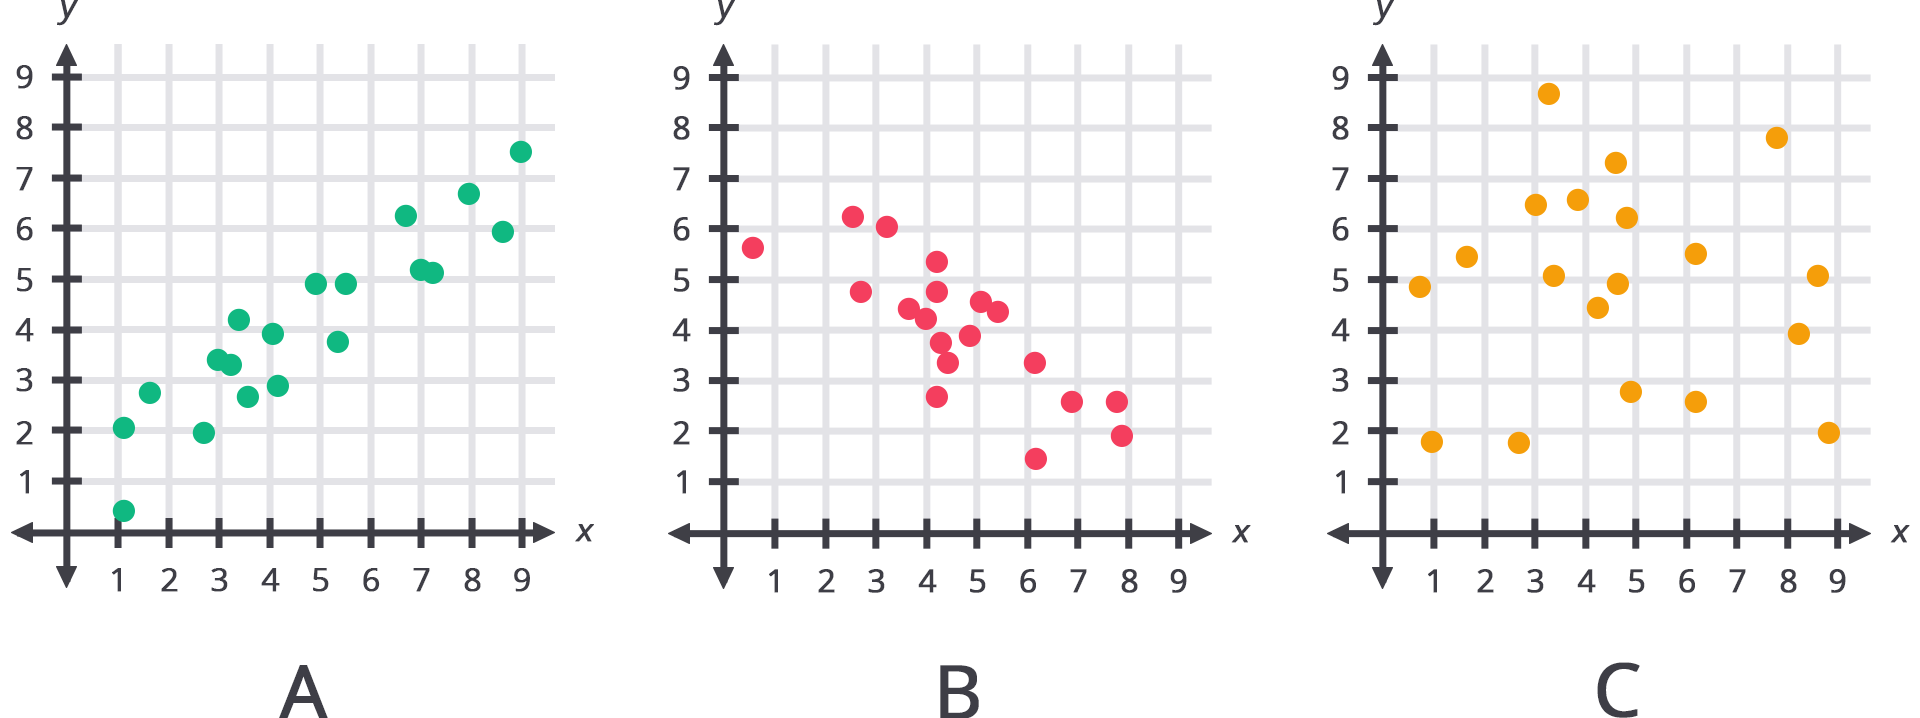

Pada pola sebaran data grafik pairplot sebelumnya, terlihat ‘carat’, ‘x’, ‘y’, dan ‘z’ memiliki korelasi yang tinggi dengan fitur "price". Sedangkan kedua fitur lainnya yaitu 'depth' dan 'table' terlihat memiliki korelasi yang lemah karena sebarannya tidak membentuk pola. Untuk mengevaluasi skor korelasinya, gunakan fungsi corr().

<ipython-input-22-7ea546970aae>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = diamonds.corr().round(2)


Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

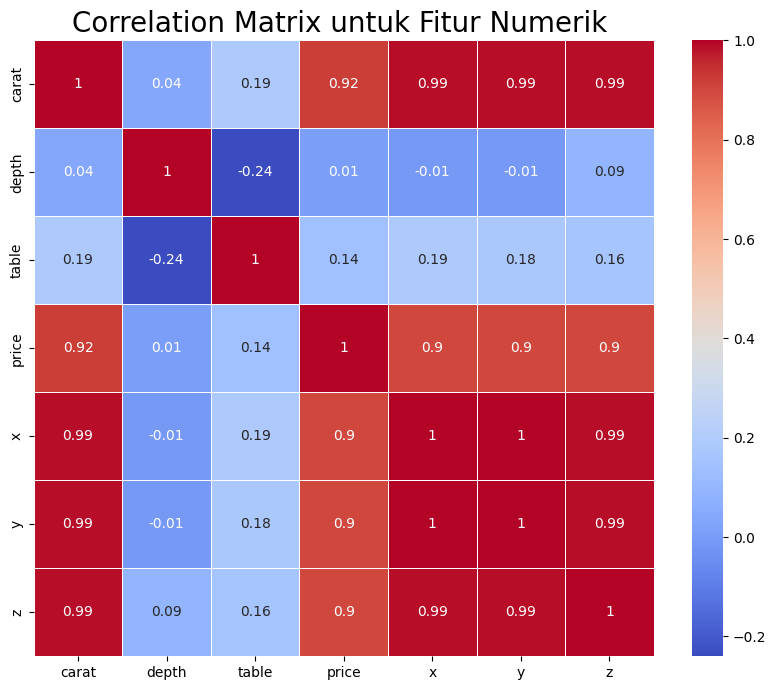

In [22]:
plt.figure(figsize=(10, 8))
correlation_matrix = diamonds.corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

Koefisien korelasi berkisar antara -1 dan +1. Ia mengukur kekuatan hubungan antara dua variabel serta arahnya (positif atau negatif). Mengenai kekuatan hubungan antar variabel, semakin dekat nilainya ke 1 atau -1, korelasinya semakin kuat. Sedangkan, semakin dekat nilainya ke 0, korelasinya semakin lemah.

Arah korelasi antara dua variabel bisa bernilai positif (nilai kedua variabel cenderung meningkat bersama-sama) maupun negatif (nilai salah satu variabel cenderung meningkat ketika nilai variabel lainnya menurun).

Nah, kembali pada grafik korelasi di atas. Jika kita amati, fitur ‘carat’, ‘x, ‘y’, dan ‘z’ memiliki skor korelasi yang besar (di atas 0.9) dengan fitur target ‘price’. Artinya, fitur 'price' berkorelasi tinggi dengan keempat fitur tersebut. Sementara itu, fitur ‘depth’ memiliki korelasi yang sangat kecil (0.01). Sehingga, fitur tersebut dapat di-drop.

In [23]:
diamonds.drop(['depth'], inplace=True, axis=1)
diamonds.head()

,carat,cut,color,clarity,table,price,x,y,z
0,0.23,Ideal,E,SI2,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,61.0,326,3.89,3.84,2.31
3,0.29,Premium,I,VS2,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,57.0,336,3.94,3.96,2.48


# Data Preparation

Ada beberapa tahapan yang umum dilakukan pada data preparation, antara lain:
- Seleksi fitur
- Transformasi data
- Feature engineering
- Dimensionality reduction

Pada bagian ini kita akan melakukan empat tahap persiapan data, yaitu:
- Encoding fitur kategori
- Reduksi dimensi dengan Principal Component Analysis (PCA)
- Pembagian dataset dengan fungsi train_test_split dari library sklearn
- Standarisasi

## Encoding Fitur Kategori

Untuk melakukan proses encoding fitur kategori, salah satu teknik yang umum dilakukan adalah teknik one-hot-encoding.

Kita memiliki tiga variabel kategori dalam dataset kita, yaitu ‘cut’, ‘color’, dan ‘clarity. Mari kita lakukan proses encoding ini dengan fitur get_dummies.

In [24]:
from sklearn.preprocessing import  OneHotEncoder
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['cut'], prefix='cut')],axis=1)
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['color'], prefix='color')],axis=1)
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['clarity'], prefix='clarity')],axis=1)
diamonds.drop(['cut','color','clarity'], axis=1, inplace=True)
diamonds.head()

,carat,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,55.0,326,3.95,3.98,2.43,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,61.0,326,3.89,3.84,2.31,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,0.29,58.0,334,4.20,4.23,2.63,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0.31,58.0,335,4.34,4.35,2.75,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
5,0.24,57.0,336,3.94,3.96,2.48,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


## Reduksi Dimensi dengan PCA

PCA umumnya digunakan ketika variabel dalam data memiliki korelasi yang tinggi. Korelasi tinggi ini menunjukkan data yang berulang atau redundant. Karena hal inilah, teknik PCA digunakan untuk mereduksi variabel asli menjadi sejumlah kecil variabel baru yang tidak berkorelasi linier, disebut komponen utama (PC). Komponen utama ini dapat menangkap sebagian besar varians dalam variabel asli. Sehingga, saat teknik PCA diterapkan pada data, ia hanya akan menggunakan komponen utama dan mengabaikan sisanya.

Berikut penjelasan untuk masing-masing komponen utama (PC):

- PC pertama mewakili arah varians maksimum dalam data. Ia paling banyak menangkap informasi dari semua fitur dalam data.
- PC kedua menangkap sebagian besar informasi yang tersisa setelah PC pertama.
- PC ketiga menangkap sebagian besar informasi yang tersisa setelah PC pertama, - PC kedua, dst.

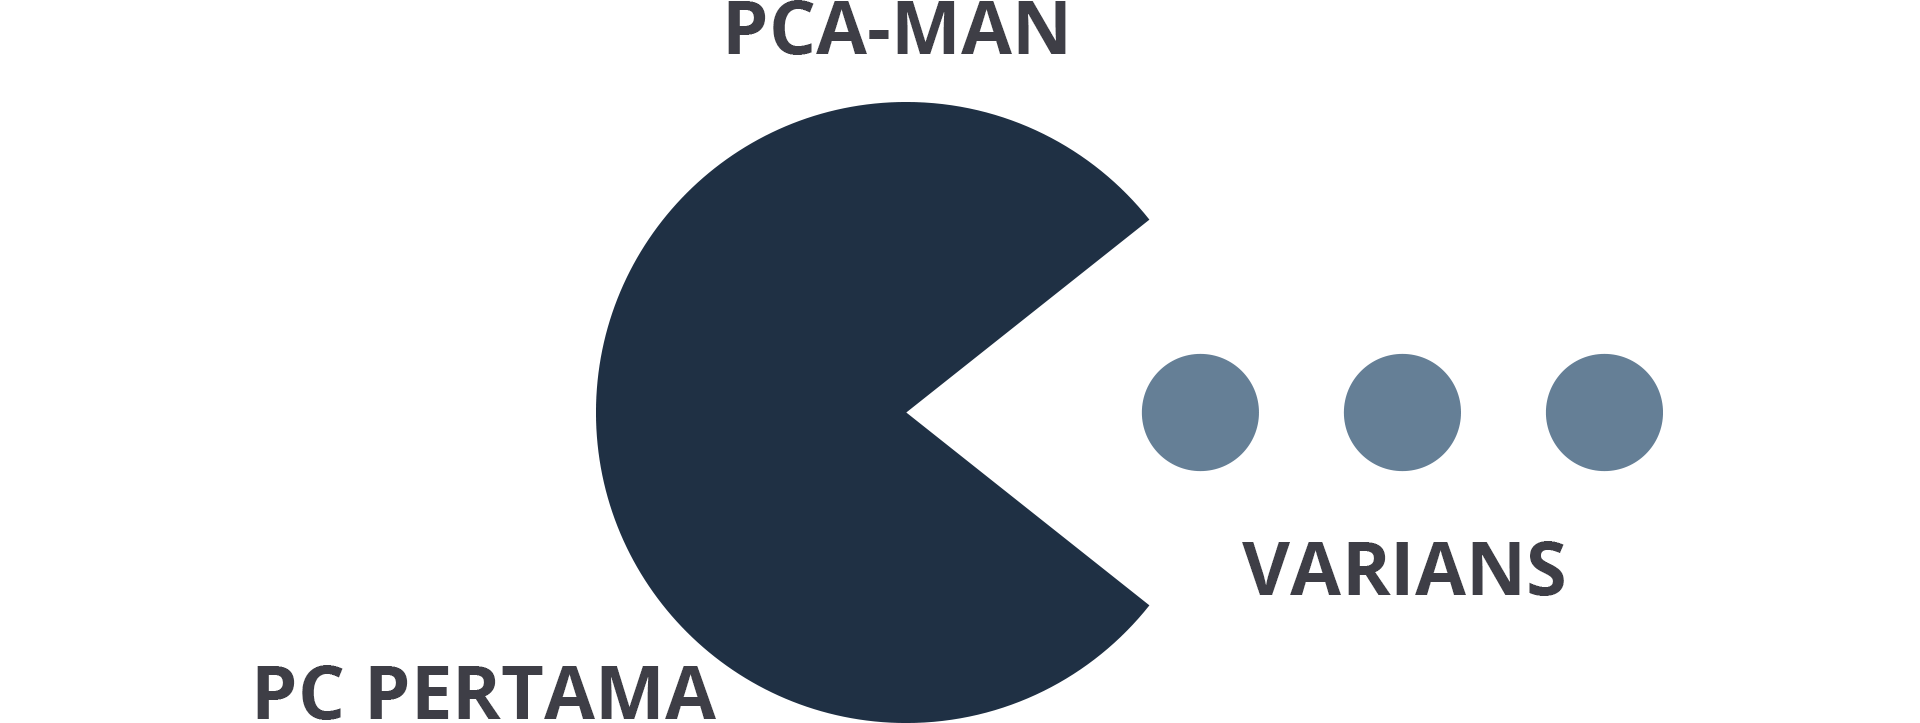

Jika kita cek menggunakan fungsi pairplot, ketiga fitur ukuran diamonds dalam kolom ‘x’, ‘y’, dan ‘z’ memiliki korelasi yang tinggi. Hal ini karena ketiga fitur ini memiliki informasi yang sama, yaitu ukuran diamonds

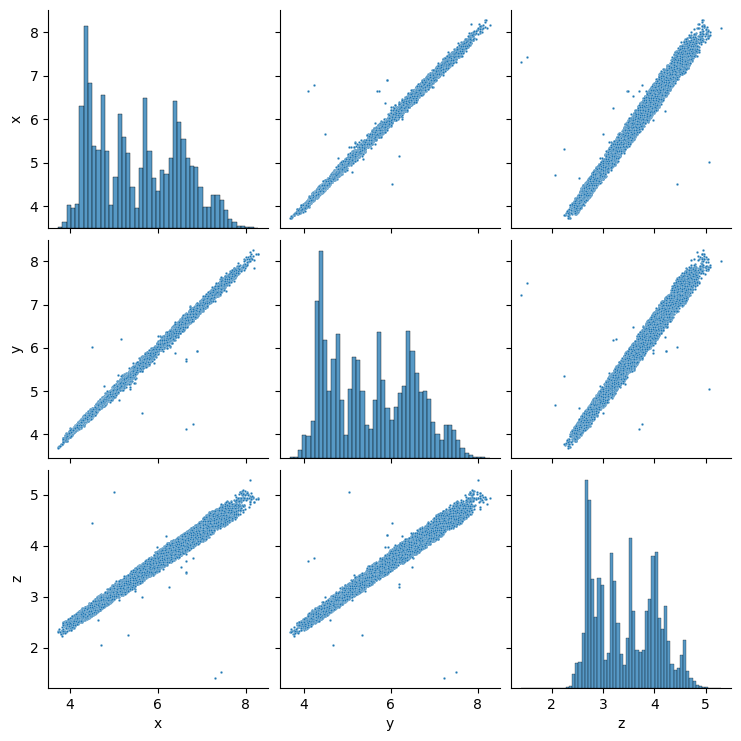

In [25]:
sns.pairplot(diamonds[['x','y','z']], plot_kws={"s": 3});

In [27]:
pca = PCA(n_components=3, random_state=123)
pca.fit(diamonds[['x','y','z']])
princ_comp = pca.transform(diamonds[['x','y','z']])

Nah, setelah menerapkan class PCA, kita bisa mengetahui proporsi informasi dari ketiga komponen tadi.

In [28]:
pca.explained_variance_ratio_.round(3)

array([0.998, 0.002, 0.001])

Arti dari output di atas adalah, 99.8% informasi pada ketiga fitur ‘x’, ‘y’, ‘z’ terdapat pada PC pertama. Sedangkan sisanya, sebesar 0.2% dan 0.1% terdapat pada PC kedua dan ketiga. Perhatikanlah, jumlahnya jadi > 100%. Hal ini disebabkan oleh proses pembulatan (round) dalam 3 desimal ya, jadi tidak perlu khawatir.

Berdasarkan hasil ini, kita akan mereduksi fitur (dimensi) dan hanya mempertahankan PC (komponen) pertama saja. PC pertama ini akan menjadi fitur dimensi atau ukuran berlian menggantikan ketiga fitur lainnya ('x', 'y', 'z'). Kita beri nama fitur ini 'dimension'.

Sekarang Anda akan membuat fitur baru bernama 'dimension' untuk menggantikan fitur 'x', 'y', dan'z' . Oleh karena itu, mari jalankan kode di atas dengan beberapa perubahan berikut:

- Gunakan n_component = 1, karena kali ini, jumlah komponen kita hanya satu.
- Fit model dengan data masukan.
- Tambahkan fitur baru ke dataset dengan nama 'dimension' dan lakukan proses transformasi.
- Drop kolom ‘x’, ‘y’, dan ‘z’.

In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1, random_state=123)
pca.fit(diamonds[['x','y','z']])
diamonds['dimension'] = pca.transform(diamonds.loc[:, ('x','y','z')]).flatten()
diamonds.drop(['x','y','z'], axis=1, inplace=True)

# Train-Test-Split

In [30]:
from sklearn.model_selection import train_test_split

X = diamonds.drop(["price"],axis =1)
y = diamonds["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

In [31]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 47524
Total # of sample in train dataset: 42771
Total # of sample in test dataset: 4753


# Standarisasi

Algoritma machine learning memiliki performa lebih baik dan konvergen lebih cepat ketika dimodelkan pada data dengan skala relatif sama atau mendekati distribusi normal. Proses scaling dan standarisasi membantu untuk membuat fitur data menjadi bentuk yang lebih mudah diolah oleh algoritma.

Standardisasi adalah teknik transformasi yang paling umum digunakan dalam tahap persiapan pemodelan. Untuk fitur numerik, kita tidak akan melakukan transformasi dengan one-hot-encoding seperti pada fitur kategori. Kita akan menggunakan teknik StandarScaler dari library Scikitlearn>

StandardScaler melakukan proses standarisasi fitur dengan mengurangkan mean (nilai rata-rata) kemudian membaginya dengan standar deviasi untuk menggeser distribusi.  StandardScaler menghasilkan distribusi dengan standar deviasi sama dengan 1 dan mean sama dengan 0. Sekitar 68% dari nilai akan berada di antara -1 dan 1.

Untuk menghindari kebocoran informasi pada data uji, kita hanya akan menerapkan fitur standarisasi pada data latih. Kemudian, pada tahap evaluasi, kita akan melakukan standarisasi pada data uji. Untuk lebih jelasnya, mari kita terapkan StandardScaler pada data.

In [32]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['carat', 'table', 'dimension']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,carat,table,dimension
536,-0.026226,0.864091,0.143464
21293,1.348407,1.359644,1.353588
45577,-0.511390,-0.622566,-0.372761
37379,-0.834833,-0.622566,-0.905790
38240,-0.861787,-0.622566,-0.813165


Seperti yang telah disebutkan sebelumnya, proses standarisasi mengubah nilai rata-rata (mean) menjadi 0 dan nilai standar deviasi menjadi 1. Untuk mengecek nilai mean dan standar deviasi pada setelah proses standarisasi, jalankan kode ini:

In [33]:
X_train[numerical_features].describe().round(4)

,carat,table,dimension
count,42771.0000,42771.0000,42771.0000
mean,0.0000,-0.0000,-0.0000
std,1.0000,1.0000,1.0000
min,-1.3739,-2.6048,-1.8867
25%,-0.8887,-0.6226,-0.9283
50%,-0.2688,-0.1270,-0.1063
75%,0.8093,0.8641,0.8847
max,3.4777,3.0941,2.6998


Perhatikan tabel di atas, sekarang nilai mean = 0 dan standar deviasi = 1.

# Model Development

## K-Nearest Neighbor

KNN adalah algoritma yang relatif sederhana dibandingkan dengan algoritma lain. Algoritma KNN menggunakan ‘kesamaan fitur’ untuk memprediksi nilai dari setiap data yang baru. Dengan kata lain, setiap data baru diberi nilai berdasarkan seberapa mirip titik tersebut dalam set pelatihan.

KNN bekerja dengan membandingkan jarak satu sampel ke sampel pelatihan lain dengan memilih sejumlah k tetangga terdekat (dengan k adalah sebuah angka positif). Nah, itulah mengapa algoritma ini dinamakan K-nearest neighbor (sejumlah k tetangga terdekat). KNN bisa digunakan untuk kasus klasifikasi dan regresi. Pada modul ini, kita akan menggunakannya untuk kasus regresi.

Bayangkan Anda ingin memprediksi berapa lama waktu yang diperlukan untuk perjalanan dari rumah ke kantor. Setiap hari selama beberapa minggu, Anda mencatat waktu berangkat dan lama perjalanan yang dibutuhkan hingga sampai di kantor. Waktu perjalanan Anda tentu dipengaruhi oleh beberapa hal, misalnya arus lalu lintas yang bervariasi di pagi hari. Hal ini menyebabkan waktu perjalanan Anda berubah, tergantung jam berapa Anda berangkat. Contoh grafik waktu keberangkatan dan lama perjalanan dapat dilihat pada gambar berikut.

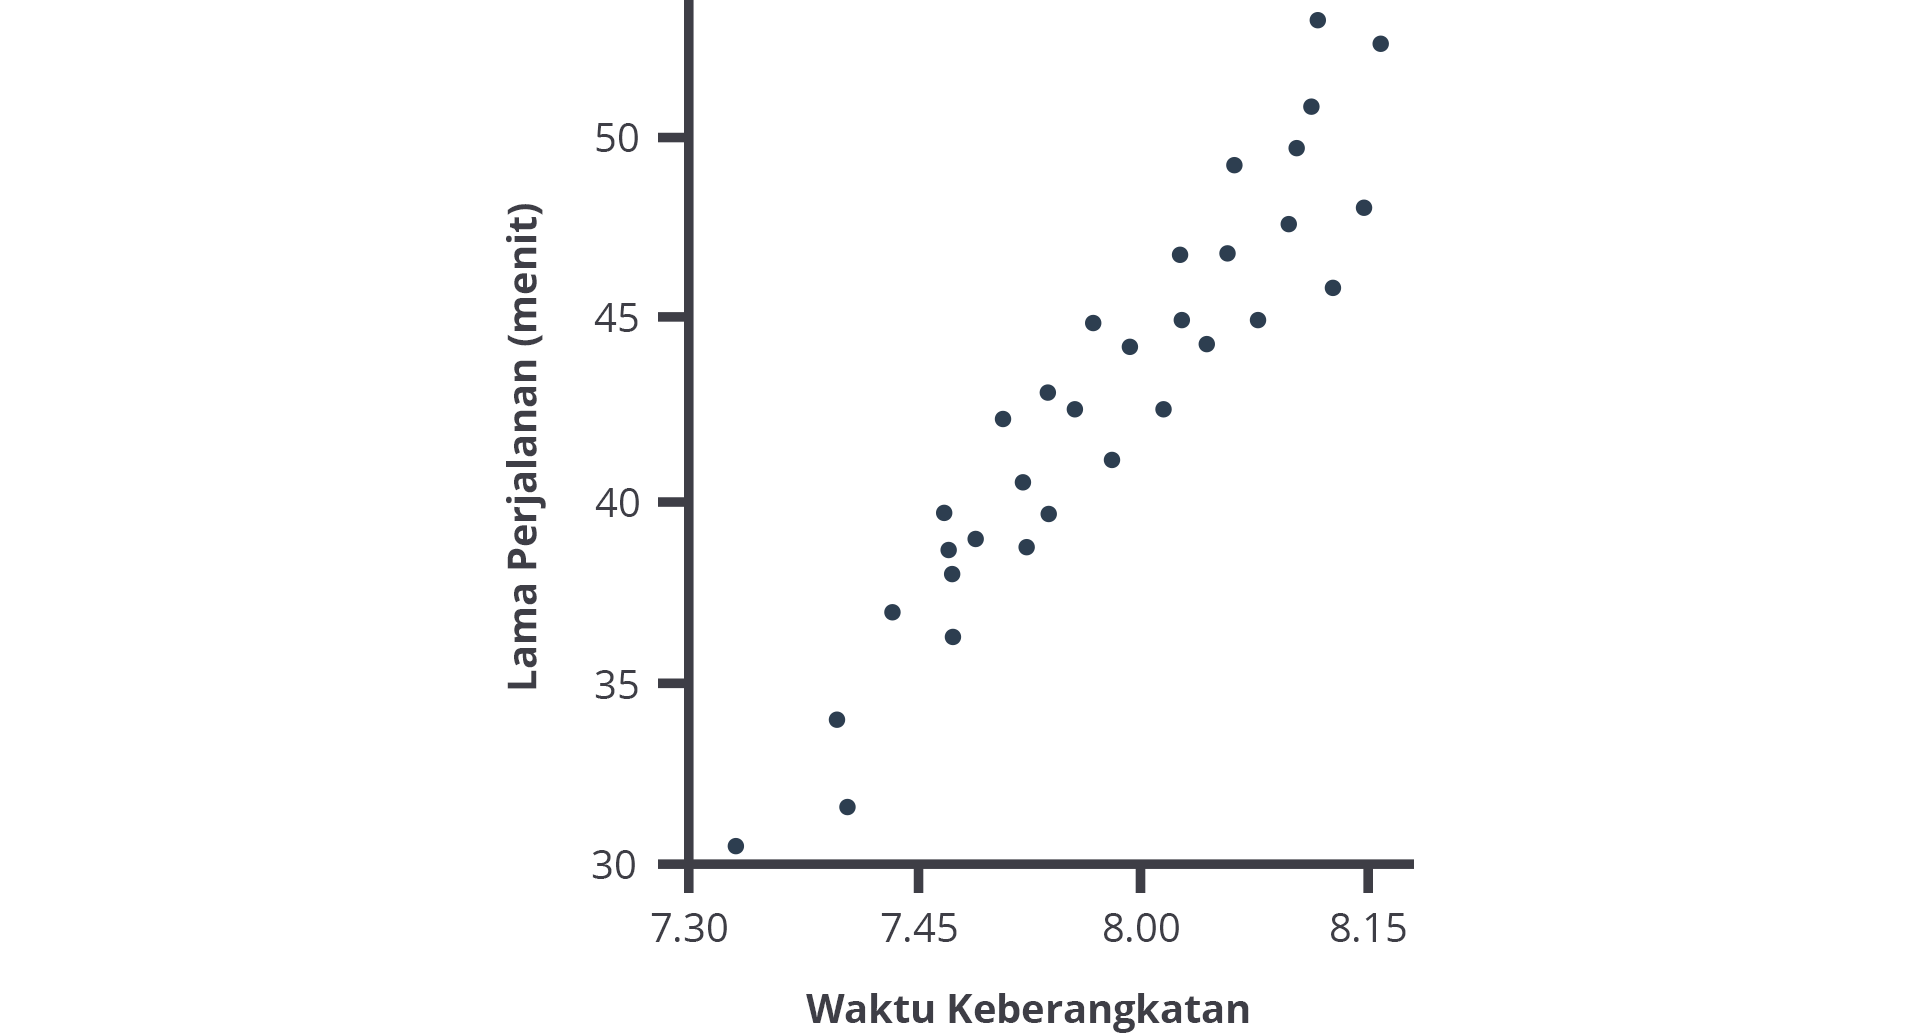

Kemudian, dengan memilih sebuah nilai X pada sumbu Waktu Keberangkatan, kita akan menentukan tiga titik (k=3) prediksi paling dekat dengan nilai X yang dipilih. Pada grafik ini ditandai dengan lingkaran merah pada titik hitam. Nilai prediksi terbaik untuk X berdasarkan ketiga titik ini adalah titik kecil berwarna merah. Perhatikanlah titik merah kecil di antara tiga titik hitam dengan lingkaran merah. Titik merah kecil ini diperoleh dari jarak rata-rata ketiga titik hitam dengan lingkaran merah.

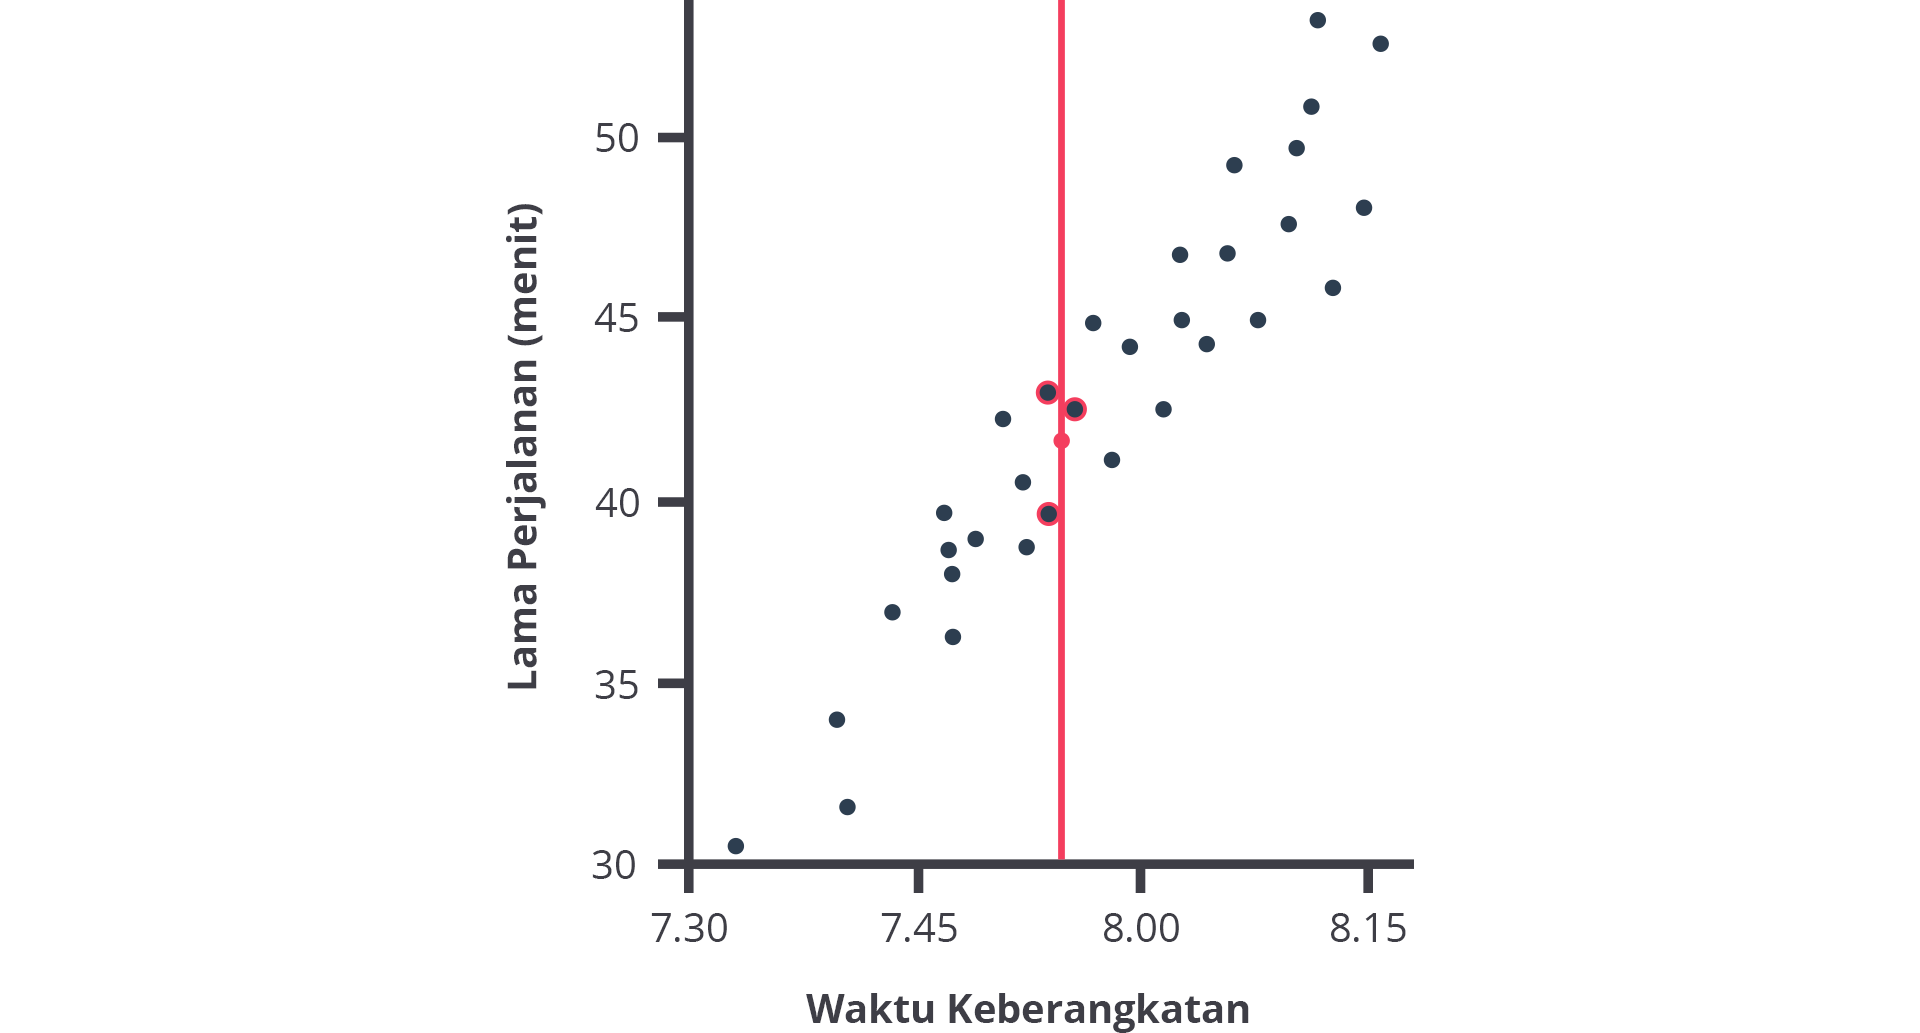

Selanjutnya, bayangkan Anda melakukan ini pada semua kemungkinan nilai masukan sehingga memperoleh nilai prediksi di beberapa tempat.
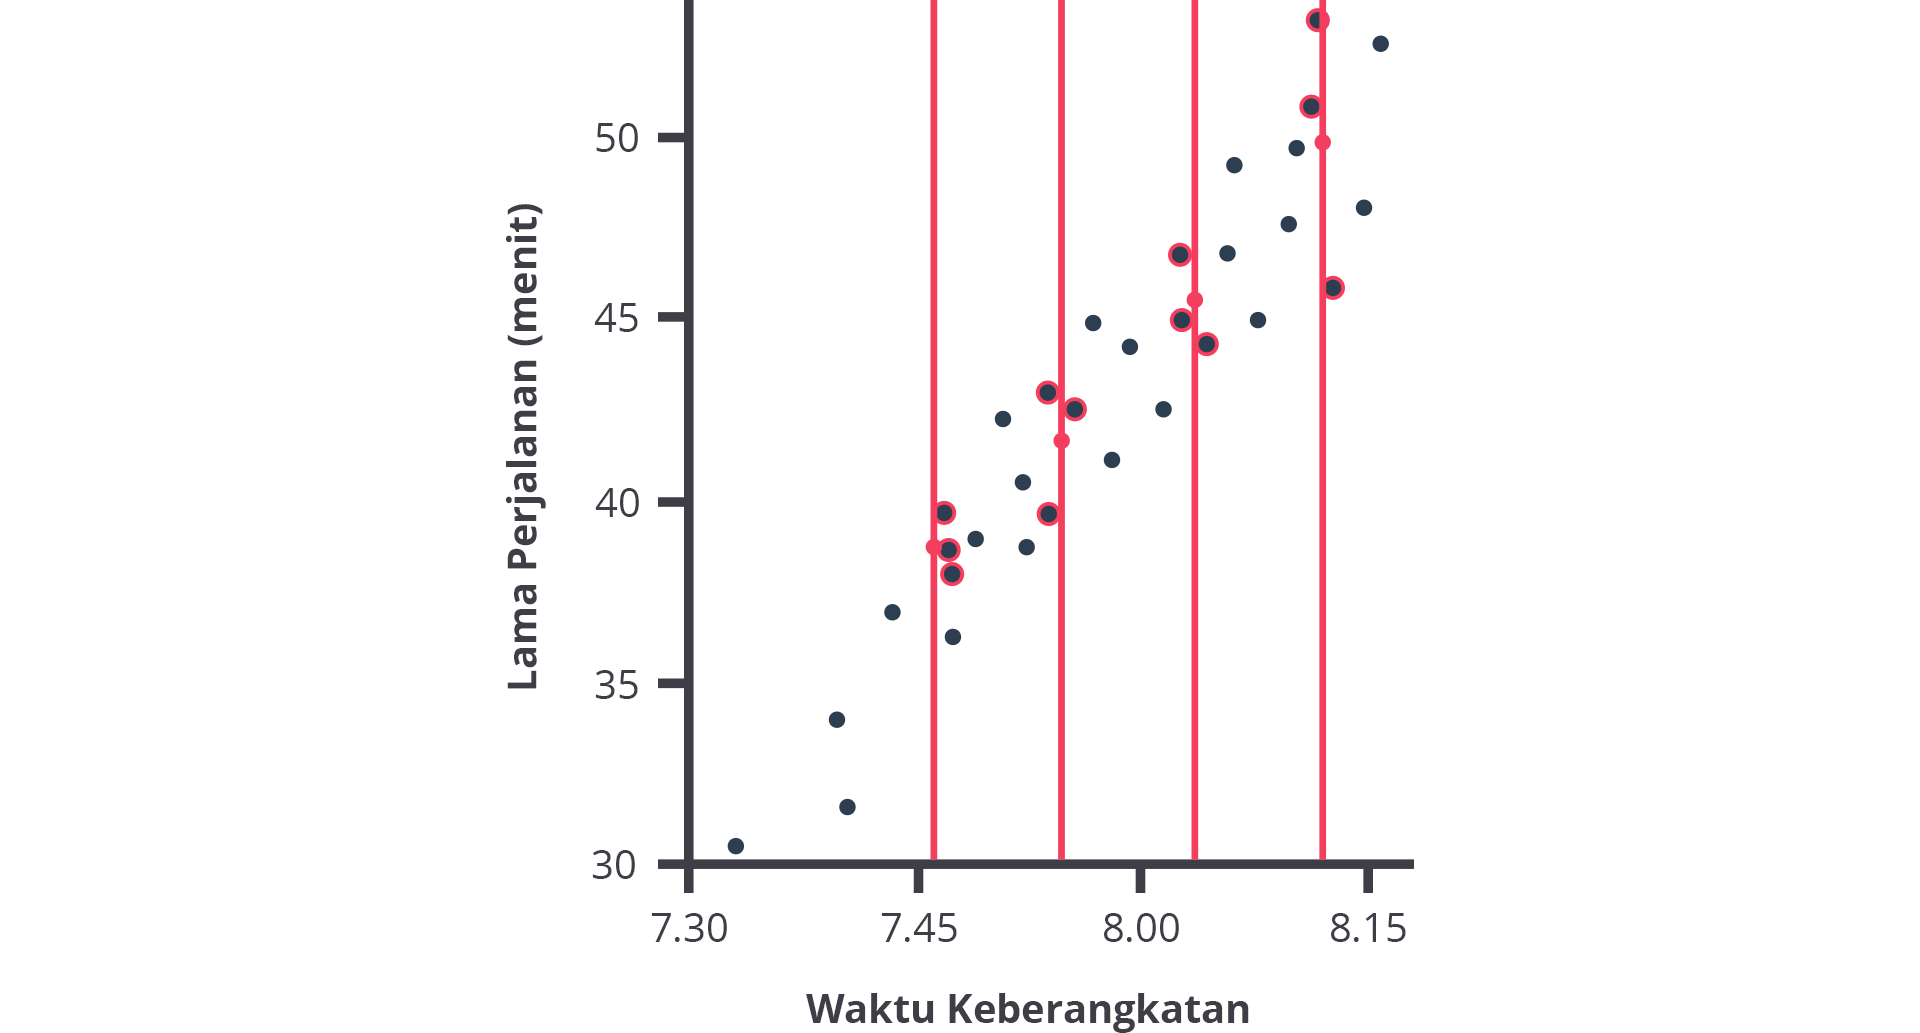

Tahap terakhir adalah menghubungkan setiap prediksi ini sehingga memberi kita hasil regresi sebagai berikut:
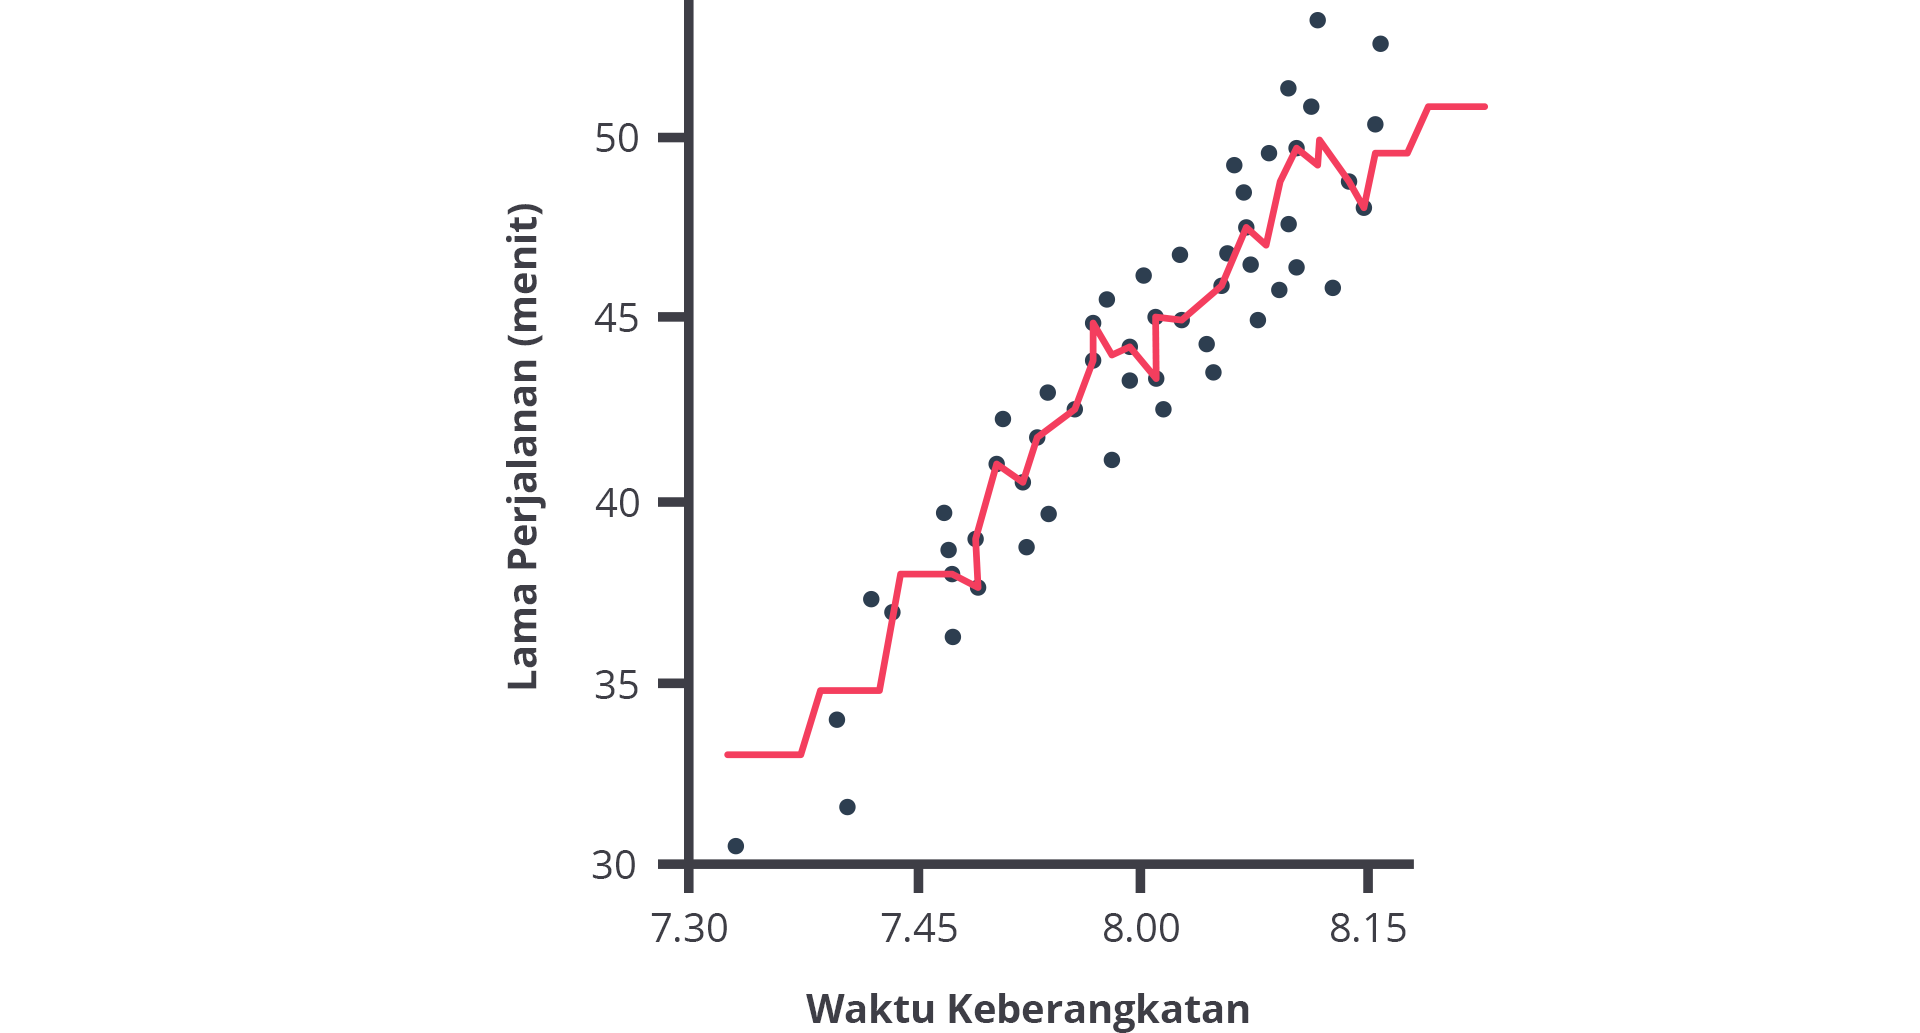

Pada contoh kasus di atas, kita membuat prediksi dengan nilai k = 3. Memilih nilai k yang lebih besar dapat membantu menghindari overfit, meskipun kadang bisa menyebabkan kehilangan kemampuan prediksi. Pada prediksi dengan nilai k = 1 (hanya mengecek satu tetangga terdekat), maka hasilnya akan sangat rigid atau kaku. Sedangkan jika kita set nilai k lebih besar, misalnya pada kasus ini k = 10, maka hasil prediksi akan lebih smooth (halus).
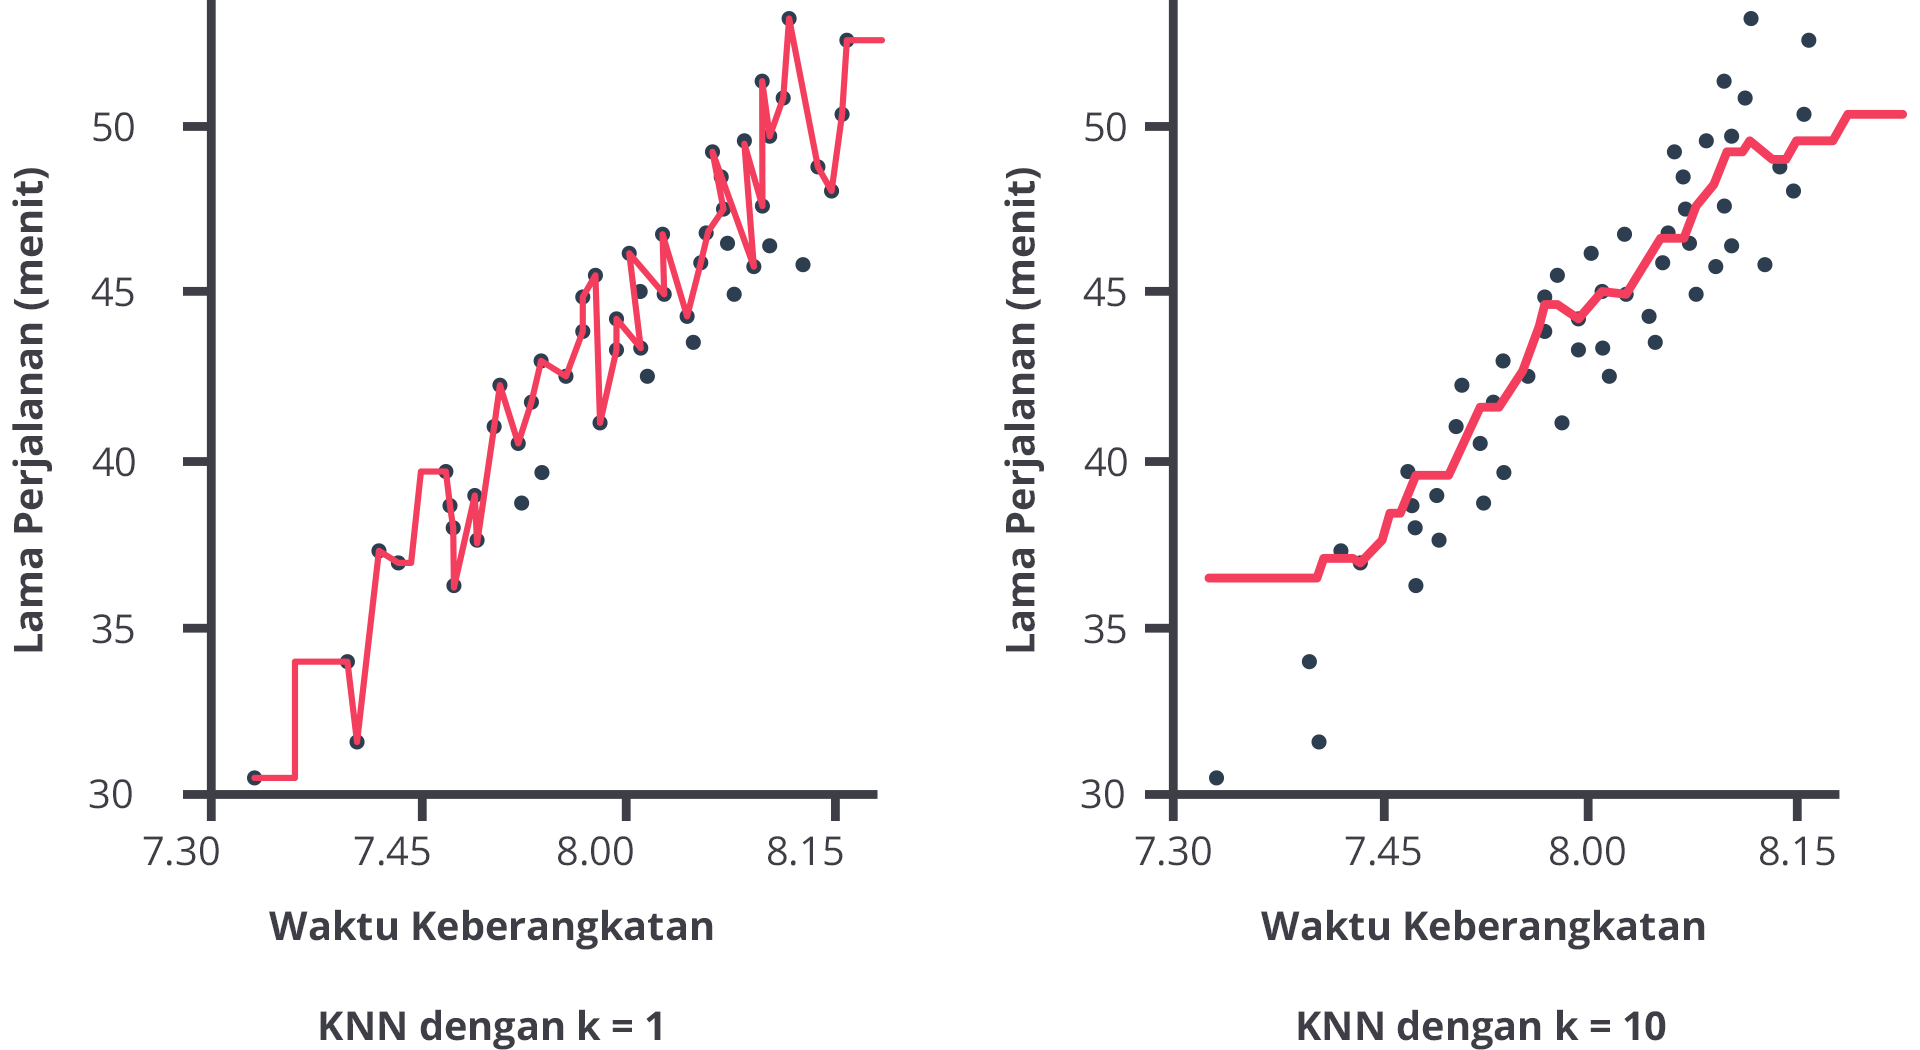

Pemilihan nilai k sangat penting dan berpengaruh terhadap performa model. Jika kita memilih k yang terlalu rendah, maka akan menghasilkan model yang overfit dan hasil prediksinya memiliki varians tinggi. Jika kita memilih k terlalu tinggi, maka model yang dihasilkan akan underfit dan prediksinya memiliki bias yang tinggi. Namun, kita dapat mencoba beberapa nilai k yang berbeda, misal: nilai dari 1 hingga 20, kemudian membandingkan mana nilai yang paling sesuai untuk model.

Selanjutnya, untuk menentukan titik mana dalam data yang paling mirip dengan input baru, KNN menggunakan perhitungan ukuran jarak. Metrik ukuran jarak yang digunakan secara default pada library sklearn adalah Minkowski distance. Beberapa metrik ukuran jarak yang juga sering dipakai antara lain: Euclidean distance dan Manhattan distance. Sebagai contoh, jarak Euclidean dihitung sebagai akar kuadrat dari jumlah selisih kuadrat antara titik a dan titik b. Dirumuskan sebagai berikut:

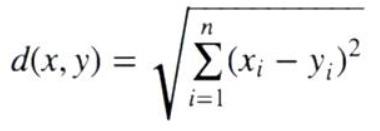

Sedangkan, Minkowski distance merupakan generalisasi dari Euclidean dan Manhattan distance. Untuk menghitungnya, perhatikan rumus berikut:

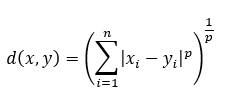

In [34]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'Boosting'])

In [35]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

Meskipun algoritma KNN mudah dipahami dan digunakan, ia memiliki kekurangan jika dihadapkan pada jumlah fitur atau dimensi yang besar. Permasalahan ini sering disebut sebagai curse of dimensionality (kutukan dimensi). Pada dasarnya, permasalahan ini muncul ketika jumlah sampel meningkat secara eksponensial seiring dengan jumlah dimensi (fitur) pada data. Jadi, jika Anda menggunakan model KNN, pastikan data yang digunakan memiliki fitur yang relatif sedikit, ya!

## Random Forest

Ada dua teknik pendekatan dalam membuat model ensemble, yaitu bagging dan boosting. Jangan bingung dulu dengan istilah ini ya. Kita akan bahas satu per satu.

Bagging atau bootstrap aggregating adalah teknik yang melatih model dengan sampel random.
- Dalam teknik bagging, sejumlah model dilatih dengan teknik sampling with replacement (proses sampling dengan penggantian). Ketika kita melakukan sampling with replacement, sampel dengan nilai yang berbeda bersifat independen. Artinya, nilai suatu sampel tidak mempengaruhi sampel lainnya. Akibatnya, model yang dilatih akan berbeda antara satu dan lainnya.

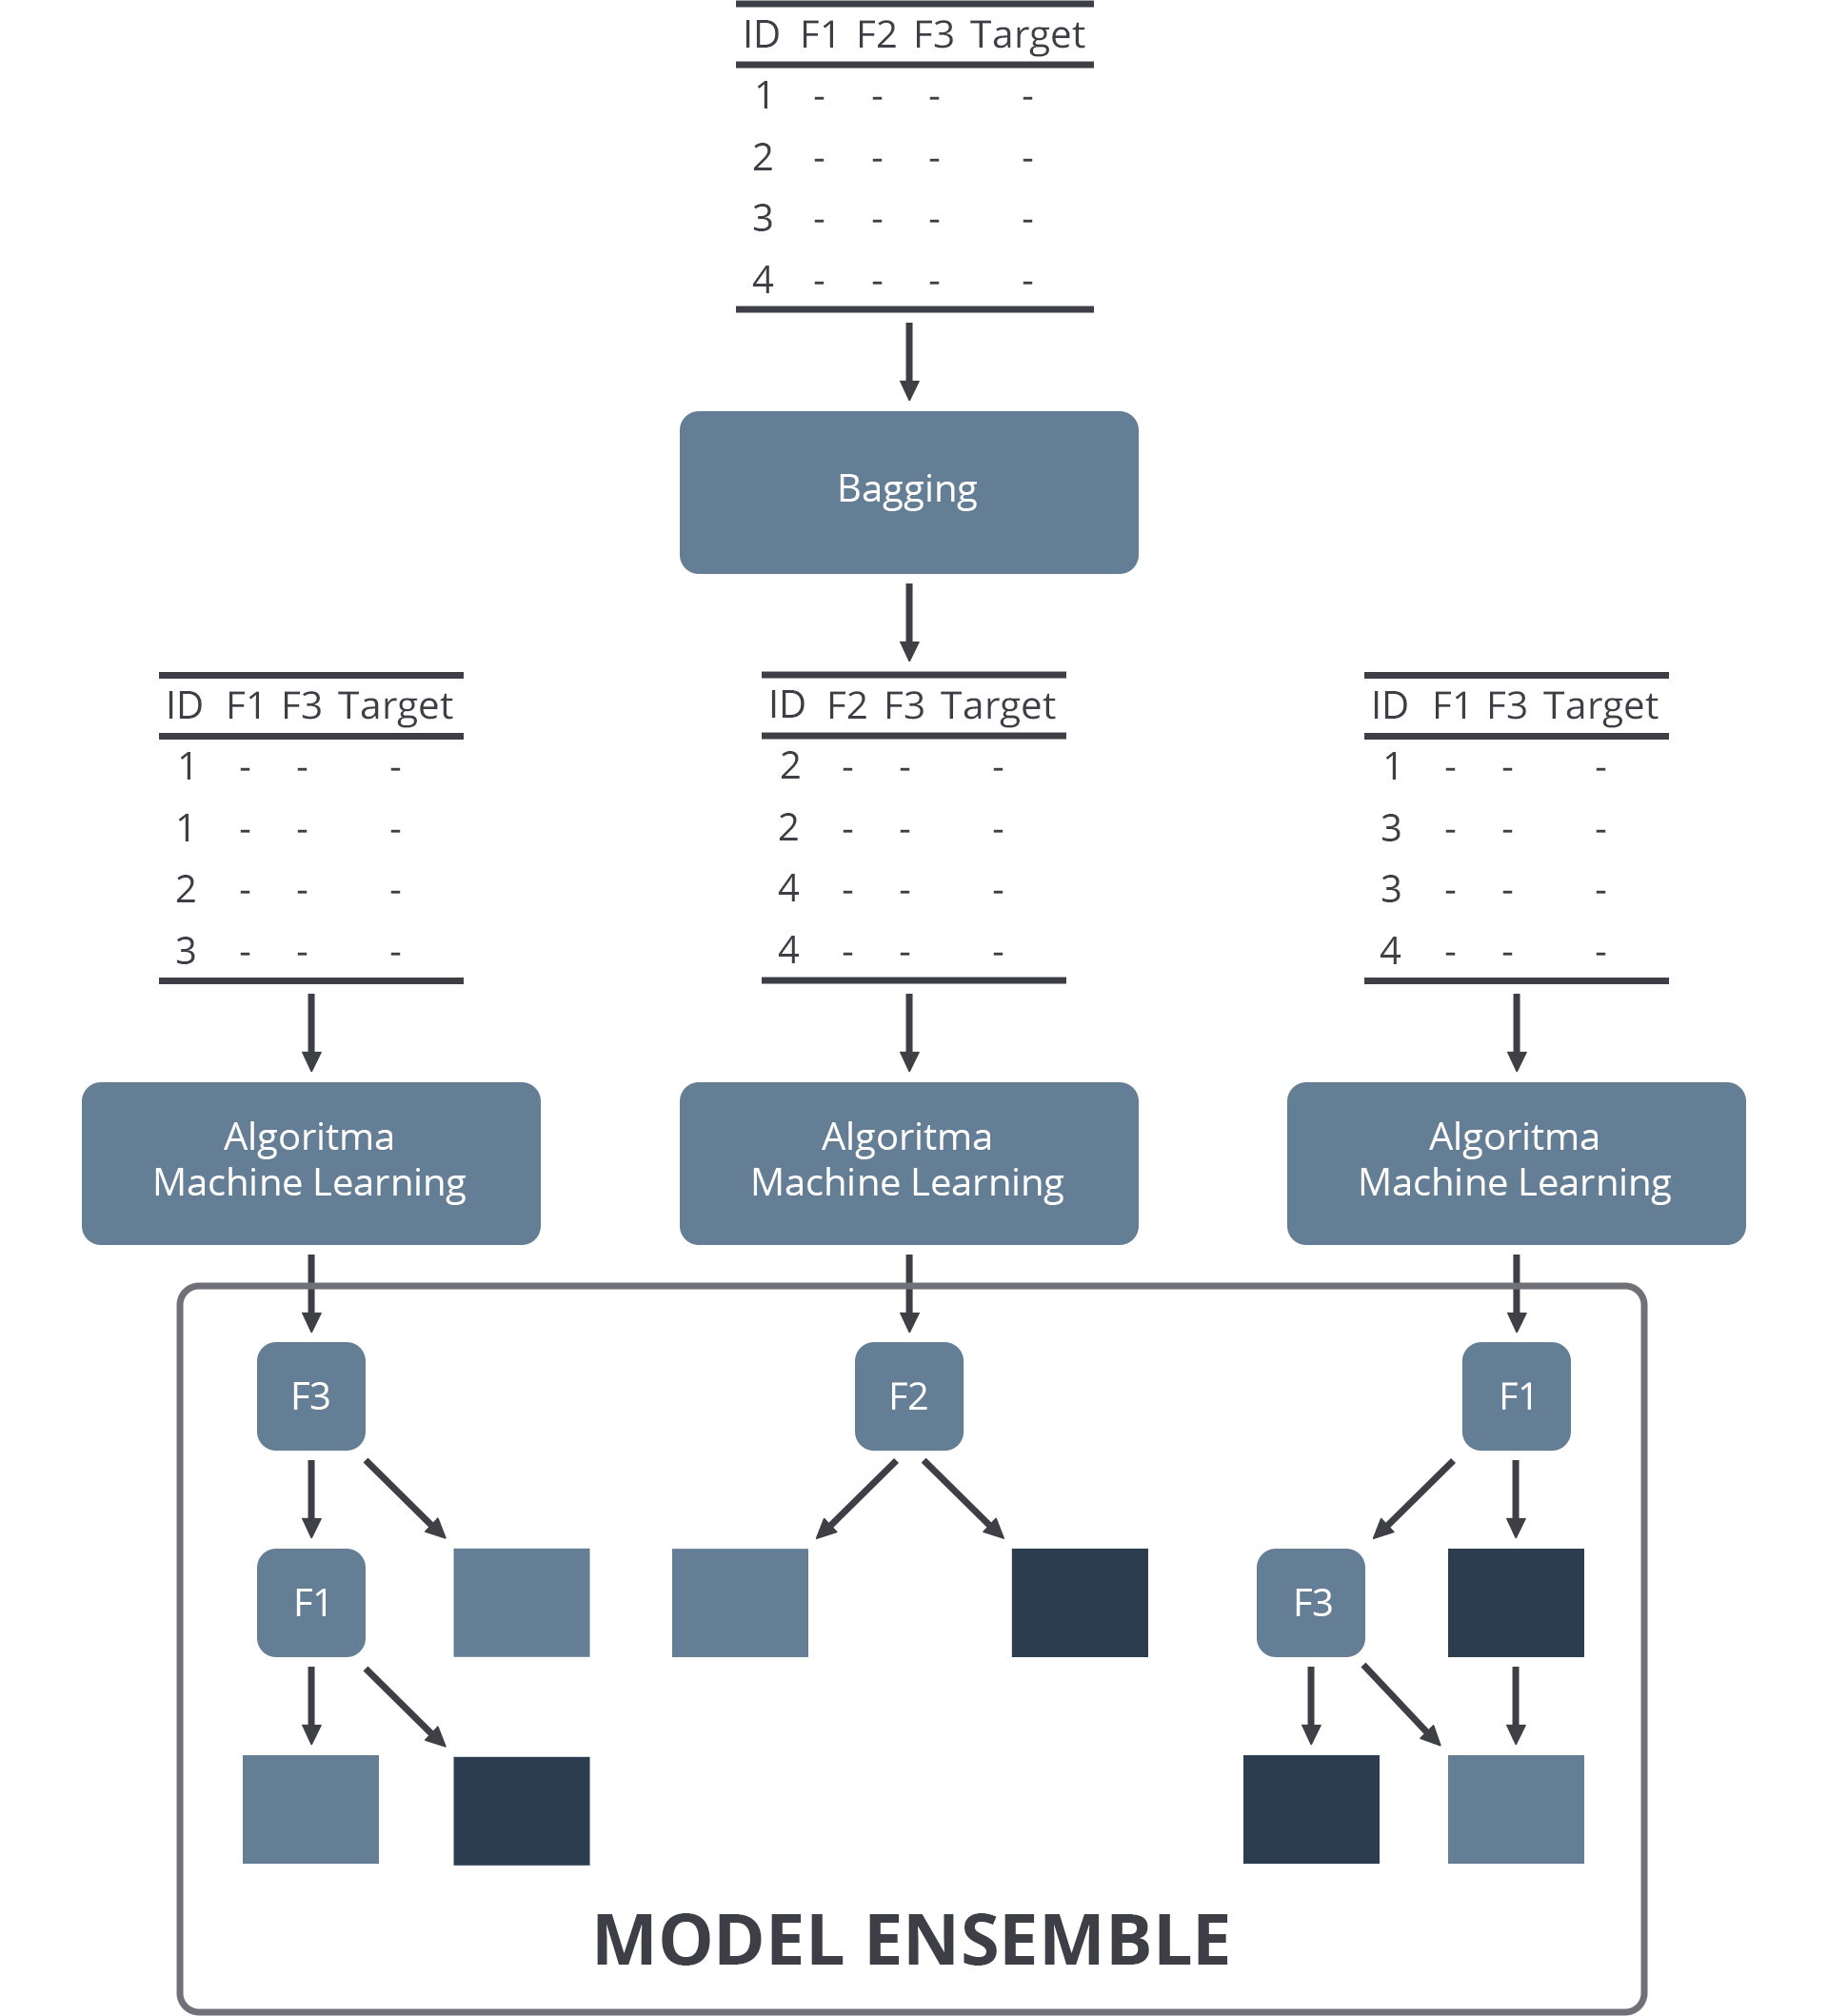

Algoritma yang cocok untuk teknik bagging ini adalah decision tree. Nah, random forest pada dasarnya adalah versi bagging dari algoritma decision tree. Bayangkan Anda memiliki satu bag (tas) random forest yang berisi beberapa model decision tree. Model decision tree masing-masing memiliki hyperparameter yang berbeda dan dilatih pada beberapa bagian (subset) data yang berbeda juga. Teknik pembagian data pada algoritma decision tree adalah memilih sejumlah fitur dan sejumlah sampel secara acak dari dataset yang terdiri dari n fitur dan m sampel.

Misalnya, ada 100 model decision tree pada bag random forest kita, ini berarti bahwa keputusan (decision) yang dibuat oleh setiap pohon (model) akan sangat bervariasi. Pada kasus klasifikasi, prediksi akhir diambil dari prediksi terbanyak pada seluruh pohon. Sedangkan, pada kasus regresi, prediksi akhir adalah rata-rata prediksi seluruh pohon dalam model ensemble.

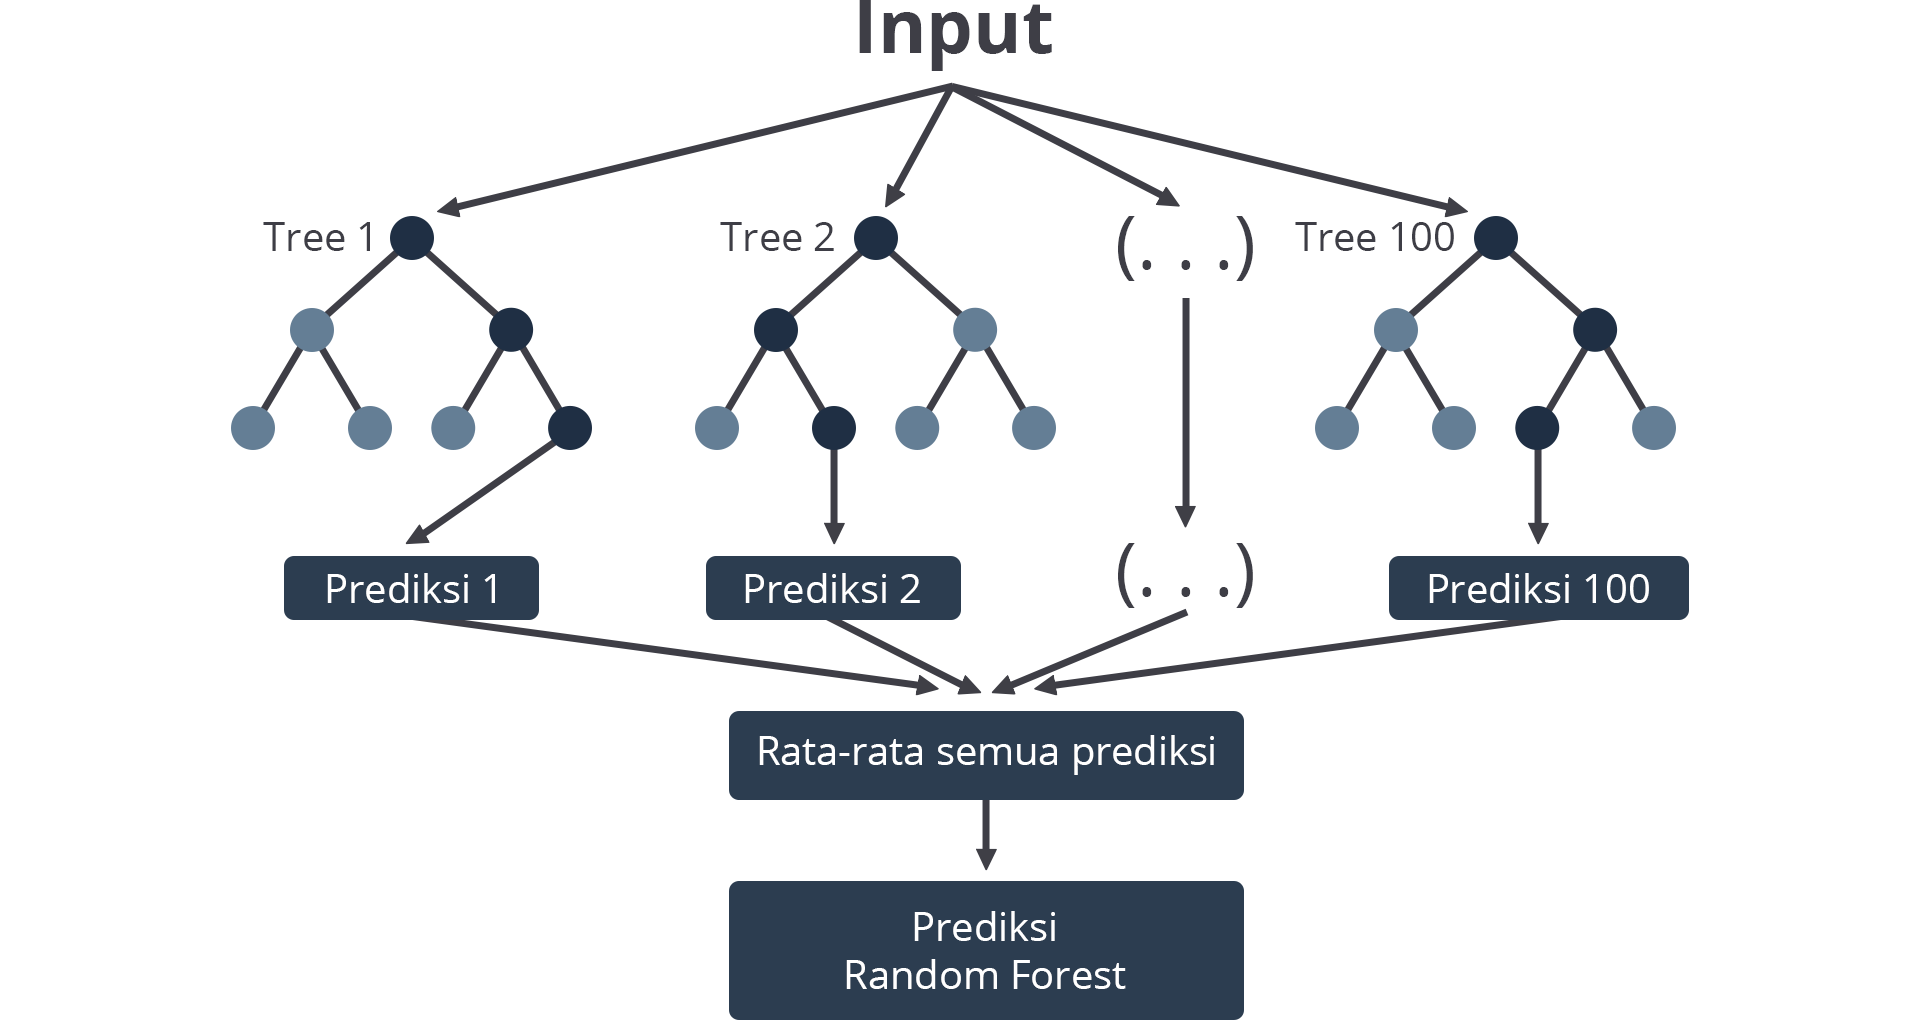

Sekarang tentu Anda mengerti, mengapa algoritma ini disebut sebagai random forest. Karena algoritma ini disusun dari banyak algoritma pohon (decision tree) yang pembagian data dan fiturnya dipilih secara acak.

Sampai di sini, mari kita lanjut menerapkan algoritma ini pada dataset menggunakan library scikit-learn.

In [36]:
# Impor library yang dibutuhkan
from sklearn.ensemble import RandomForestRegressor

# buat model prediksi
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

Perhatikanlah potongan kode di atas. Pertama, Anda mengimpor RandomForestRegressor dari library scikit-learn. Anda juga mengimpor mean_squared_error sebagai metrik untuk mengevaluasi performa model. Selanjutnya, Anda membuat variabel RF dan memanggil RandomForestRegressor dengan beberapa nilai parameter. Berikut adalah parameter-parameter yang digunakan:

- n_estimator: jumlah trees (pohon) di forest. Di sini kita set n_estimator=50.
- max_depth: kedalaman atau panjang pohon. Ia merupakan ukuran seberapa banyak pohon dapat membelah (splitting) untuk membagi setiap node ke dalam jumlah pengamatan yang diinginkan.
- random_state: digunakan untuk mengontrol random number generator yang digunakan.
- n_jobs: jumlah job (pekerjaan) yang digunakan secara paralel. Ia merupakan komponen untuk mengontrol thread atau proses yang berjalan secara paralel.
- n_jobs=-1 artinya semua proses berjalan secara paralel.

## Boosting Algorithm

Seperti namanya, boosting, algoritma ini bertujuan untuk meningkatkan performa atau akurasi prediksi. Caranya adalah dengan menggabungkan beberapa model sederhana dan dianggap lemah (weak learners) sehingga membentuk suatu model yang kuat (strong ensemble learner). Algoritma boosting muncul dari gagasan mengenai apakah algoritma yang sederhana seperti linear regression dan decision tree dapat dimodifikasi untuk dapat meningkatkan performa.

Algoritma boosting telah ada sejak puluhan tahun lalu. Namun, baru beberapa tahun ini ramai dibicarakan. Mengapa algoritma ini begitu populer akhir-akhir ini?

Salah satu alasannya adalah peningkatan algoritma boosting dalam kompetisi machine learning atau data science. Algoritma ini sangat powerful dalam meningkatkan akurasi prediksi. Algoritma boosting sering mengungguli model yang lebih sederhana seperti logistic regression dan random forest. Beberapa pemenang kompetisi di platform Kaggle menyatakan bahwa mereka menggunakan algoritma boosting atau kombinasi beberapa algoritma boosting dalam modelnya. Meskipun demikian, hal ini tetap bergantung pada kasus per kasus, ruang lingkup masalah, dan dataset yang digunakan.

Dilihat dari caranya memperbaiki kesalahan pada model sebelumnya, algoritma boosting terdiri dari dua metode:

- Adaptive boosting
- Gradient boosting
Pada modul ini, kita akan menggunakan metode adaptive boosting. Salah satu metode adaptive boosting yang terkenal adalah AdaBoost, dikenalkan oleh Freund and Schapire (1995). Pertanyaannya adalah, bagaimana AdaBoost bekerja?

Awalnya, semua kasus dalam data latih memiliki weight atau bobot yang sama. Pada setiap tahapan, model akan memeriksa apakah observasi yang dilakukan sudah benar? Bobot yang lebih tinggi kemudian diberikan pada model yang salah sehingga mereka akan dimasukkan ke dalam tahapan selanjutnya. Proses iteratif ini berlanjut sampai model mencapai akurasi yang diinginkan.

In [37]:
from sklearn.ensemble import AdaBoostRegressor

boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

Berikut merupakan parameter-parameter yang digunakan pada potongan kode di atas.

- learning_rate: bobot yang diterapkan pada setiap regressor di masing-masing proses iterasi boosting.
- random_state: digunakan untuk mengontrol random number generator yang digunakan.

## Evaluasi Model

Metrik yang akan kita gunakan pada prediksi ini adalah MSE atau Mean Squared Error yang menghitung jumlah selisih kuadrat rata-rata nilai sebenarnya dengan nilai prediksi. MSE didefinisikan dalam persamaan berikut

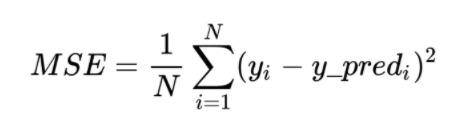

Namun, sebelum menghitung nilai MSE dalam model, kita perlu melakukan proses scaling fitur numerik pada data uji. Sebelumnya, kita baru melakukan proses scaling pada data latih untuk menghindari kebocoran data. Sekarang, setelah model selesai dilatih dengan 3 algoritma, yaitu KNN, Random Forest, dan Adaboost, kita perlu melakukan proses scaling terhadap data uji. Hal ini harus dilakukan agar skala antara data latih dan data uji sama dan kita bisa melakukan evaluasi.

Untuk proses scaling, implementasikan kode berikut:

In [38]:
# Lakukan scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata=0 dan varians=1
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

In [39]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

# Panggil mse
mse

,train,test
KNN,203.761114,239.529923
RF,52.287366,130.788418
Boosting,904.838013,846.212966


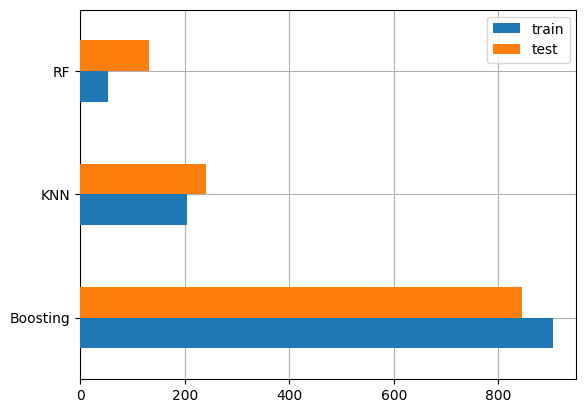

In [40]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Dari gambar di atas, terlihat bahwa, model Random Forest (RF) memberikan nilai eror yang paling kecil. Sedangkan model dengan algoritma Boosting memiliki eror yang paling besar (berdasarkan grafik, angkanya di atas 800). Model inilah yang akan kita pilih sebagai model terbaik untuk melakukan prediksi harga diamonds.

Untuk mengujinya, mari kita buat prediksi menggunakan beberapa harga dari data test.

In [41]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
35096,886,923.2,884.2,788.1


Terlihat bahwa prediksi dengan Random Forest (RF) memberikan hasil yang paling mendekati. Anda juga bisa menguji hasil prediksi pada data lain dengan cara mengubah indeks pada X_test. Jika Anda merasa belum yakin dengan model ini, lakukanlah pengaturan parameter pada algoritma yang digunakan. Sebagai contoh, pada algoritma Random Forest, Anda dapat mengubah berbagai parameter seperti n_estimators (jumlah pohon/trees dalam forest), atau parameter lain. Anda dapat merujuk pada dokumentasi Random Forest pada library sklearn untuk pengaturan parameter lainnya.

Untuk melakukan peningkatan performa, lakukanlah hal yang sama (pengaturan parameter) pada semua algoritma yang digunakan. Selain itu, Anda juga dapat melakukan optimasi parameter dengan menerapkan teknik Grid Search.